In [269]:
using Plots
using JLD2
using LaTeXStrings
using ColorTypes

In [270]:
include("parameters.jl")
using .MyParams

Load data

In [271]:
script_dir = @__DIR__
plot_folder = joinpath(script_dir, "plots")
if !isdir(plot_folder)
    mkdir(plot_folder)
end

In [272]:
data_dict = Dict()
for Ω in MyParams.Ω_values
    file_name = "results_data/sz_mean_steady_for_$(MyParams.case)D,Ω=$(Ω).jld2"
    data_dict[Ω] = load(file_name)
end

Plots

In [273]:
default(dpi=300)

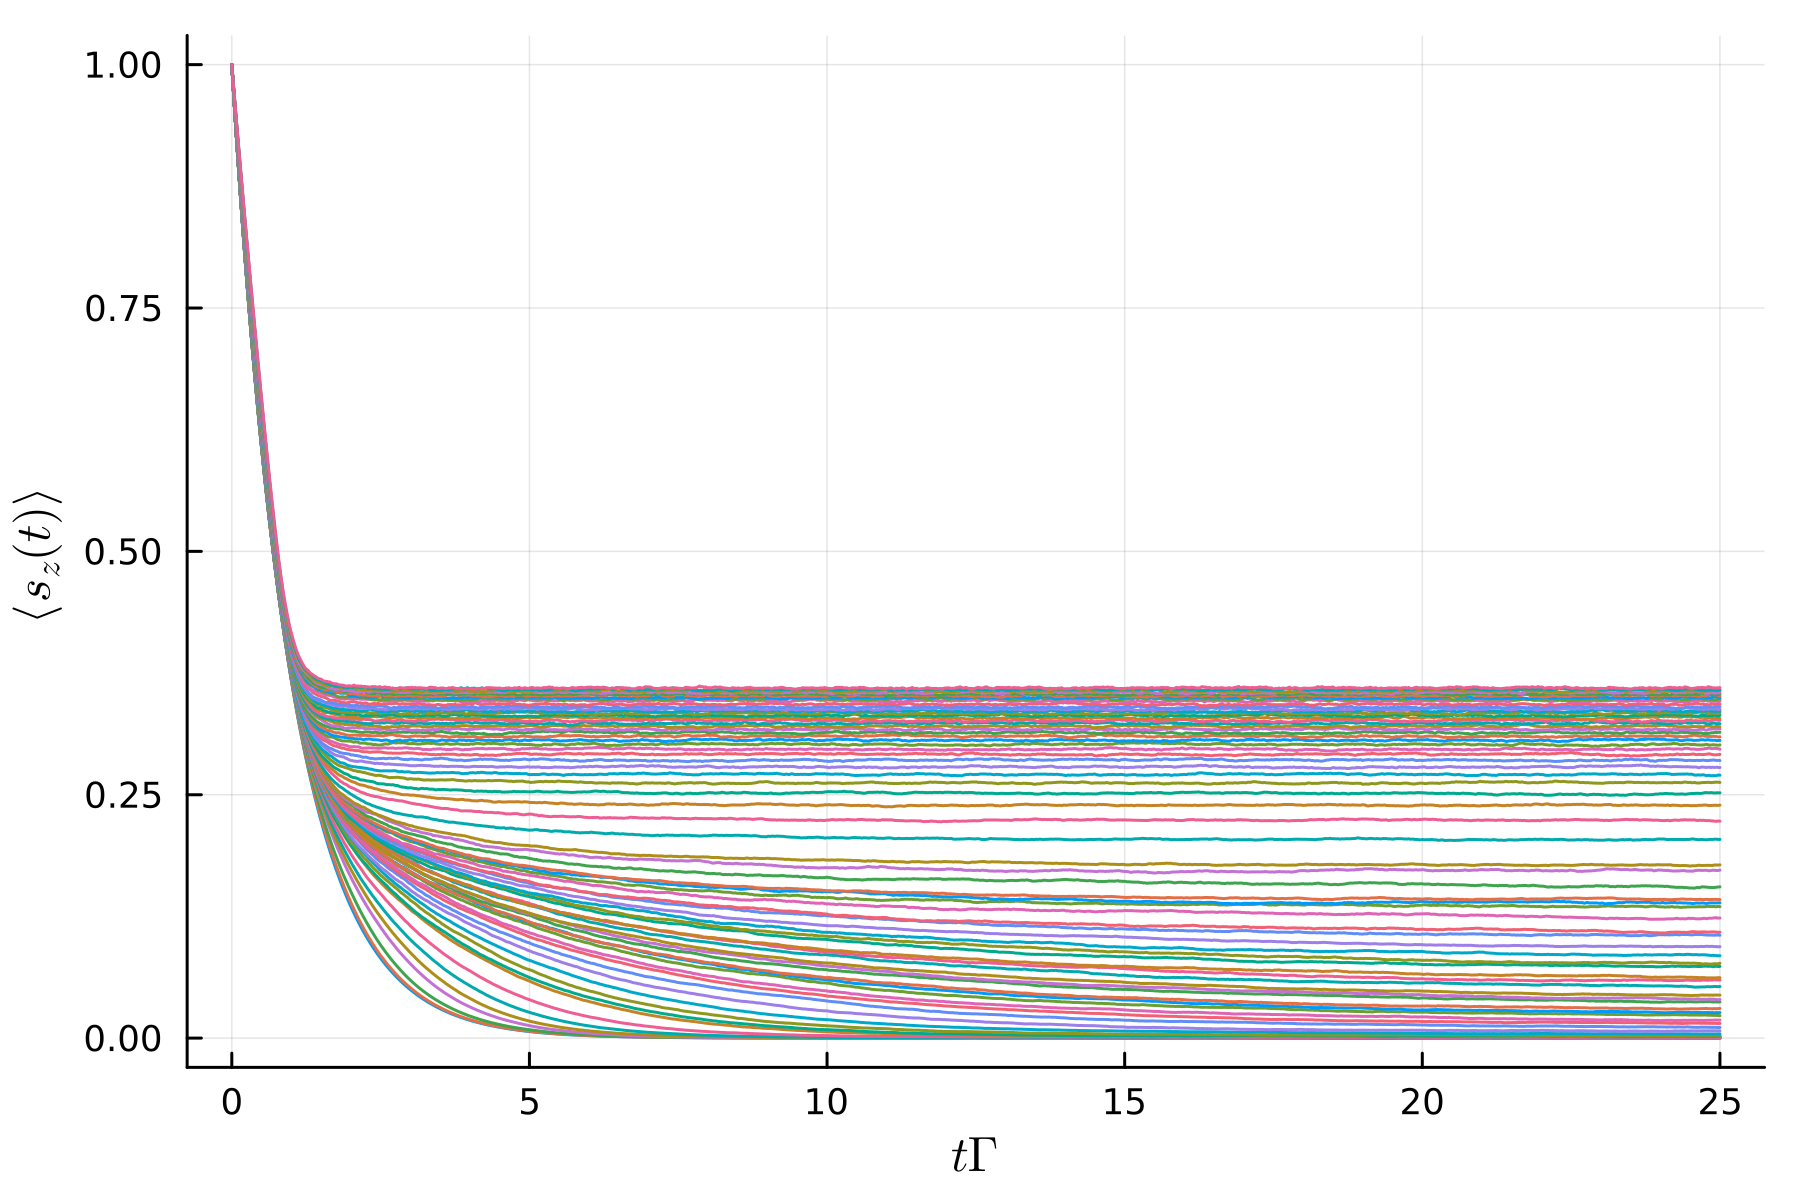

"/amd/home/agfleischhauer/quw51vuk/ResearchProj/TWA/Rydberg_facilitation/plots/dynamic_rydberg_facilitation_2D,400 atoms, γ = 20, Δ = 400.png"

In [290]:
p1 = plot(
    legend=false
)
for Ω in MyParams.Ω_values
    data = data_dict[Ω]
    t = data["t"]
    sz_mean_mean = vec(data["sz_mean_mean"])
    plot!(p1, t, sz_mean_mean, label="Ω=$(Ω)")
end
xlabel!(p1, L"t \Gamma")
ylabel!(p1, L"\langle s_z(t) \rangle")
display(p1)
savefig("plots/dynamic_rydberg_facilitation_$(MyParams.case)D,$(MyParams.nAtoms) atoms, γ = $(MyParams.γ), Δ = $(MyParams.Δ).png")

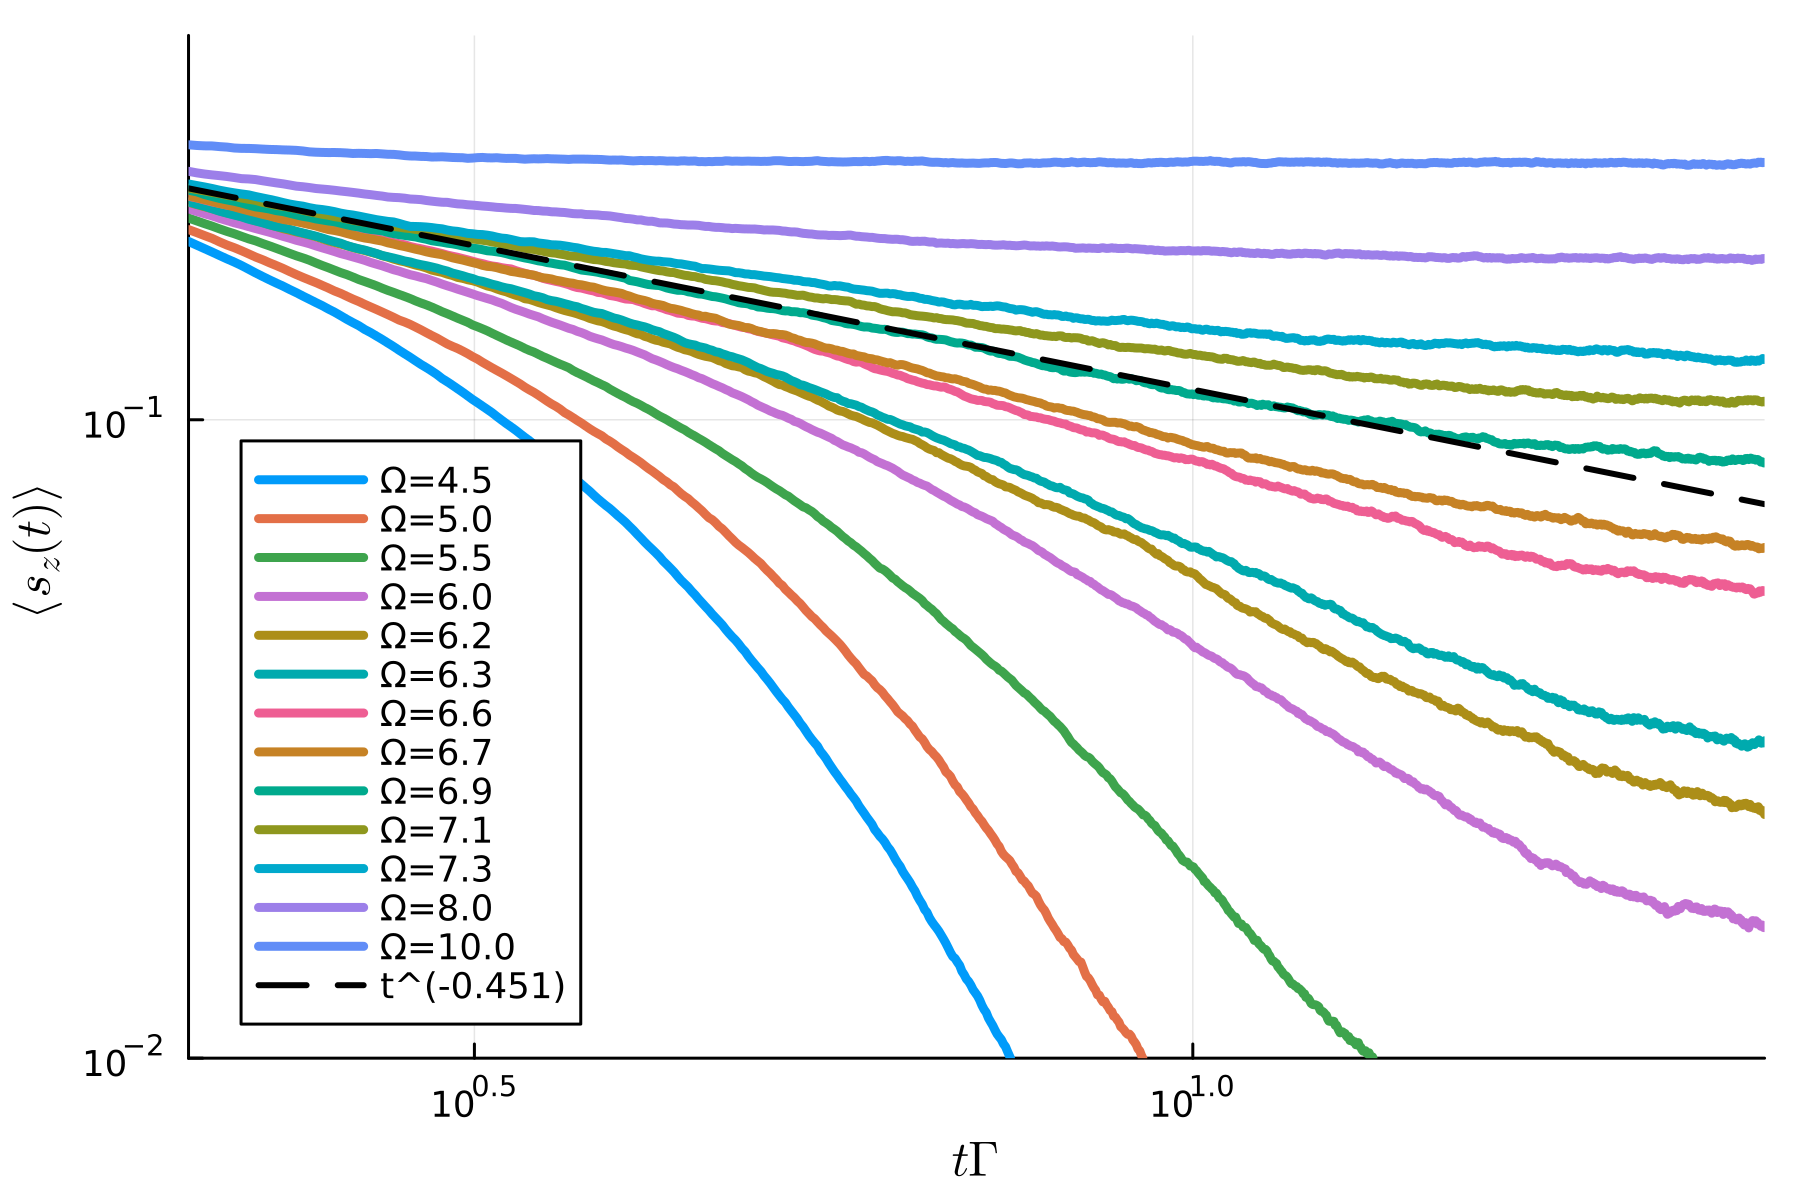

In [291]:
p6 = plot(
    xscale=:log10,
    yscale=:log10,
    legend=:bottomleft,
    xlim=[2,25],
    ylim=[0.01,0.4],
)
for Ω in MyParams.Ω_values
    if Ω in (4.5,5,5.5,6,6.2,6.3,6.6,6.7,6.9,7.1,7.3,8,10)
        data = data_dict[Ω]
        t = data["t"]
        sz_mean_mean = vec(data["sz_mean_mean"])
        plot!(p6, t, sz_mean_mean .+ 1e-3, label="Ω=$(Ω)", linewidth=3)
    end
end
data = data_dict[1]
t = data["t"]
t_dash = t
dash_line = t_dash .^ (-MyParams.delta) .* 0.315
plot!(p6, t_dash, dash_line,
    linestyle=:dash, 
    color=:black, 
    linewidth=2, label="t^(-$(MyParams.delta))")
xlabel!(p6, L"t \Gamma")
ylabel!(p6, L"\langle s_z(t) \rangle")
display(p6)

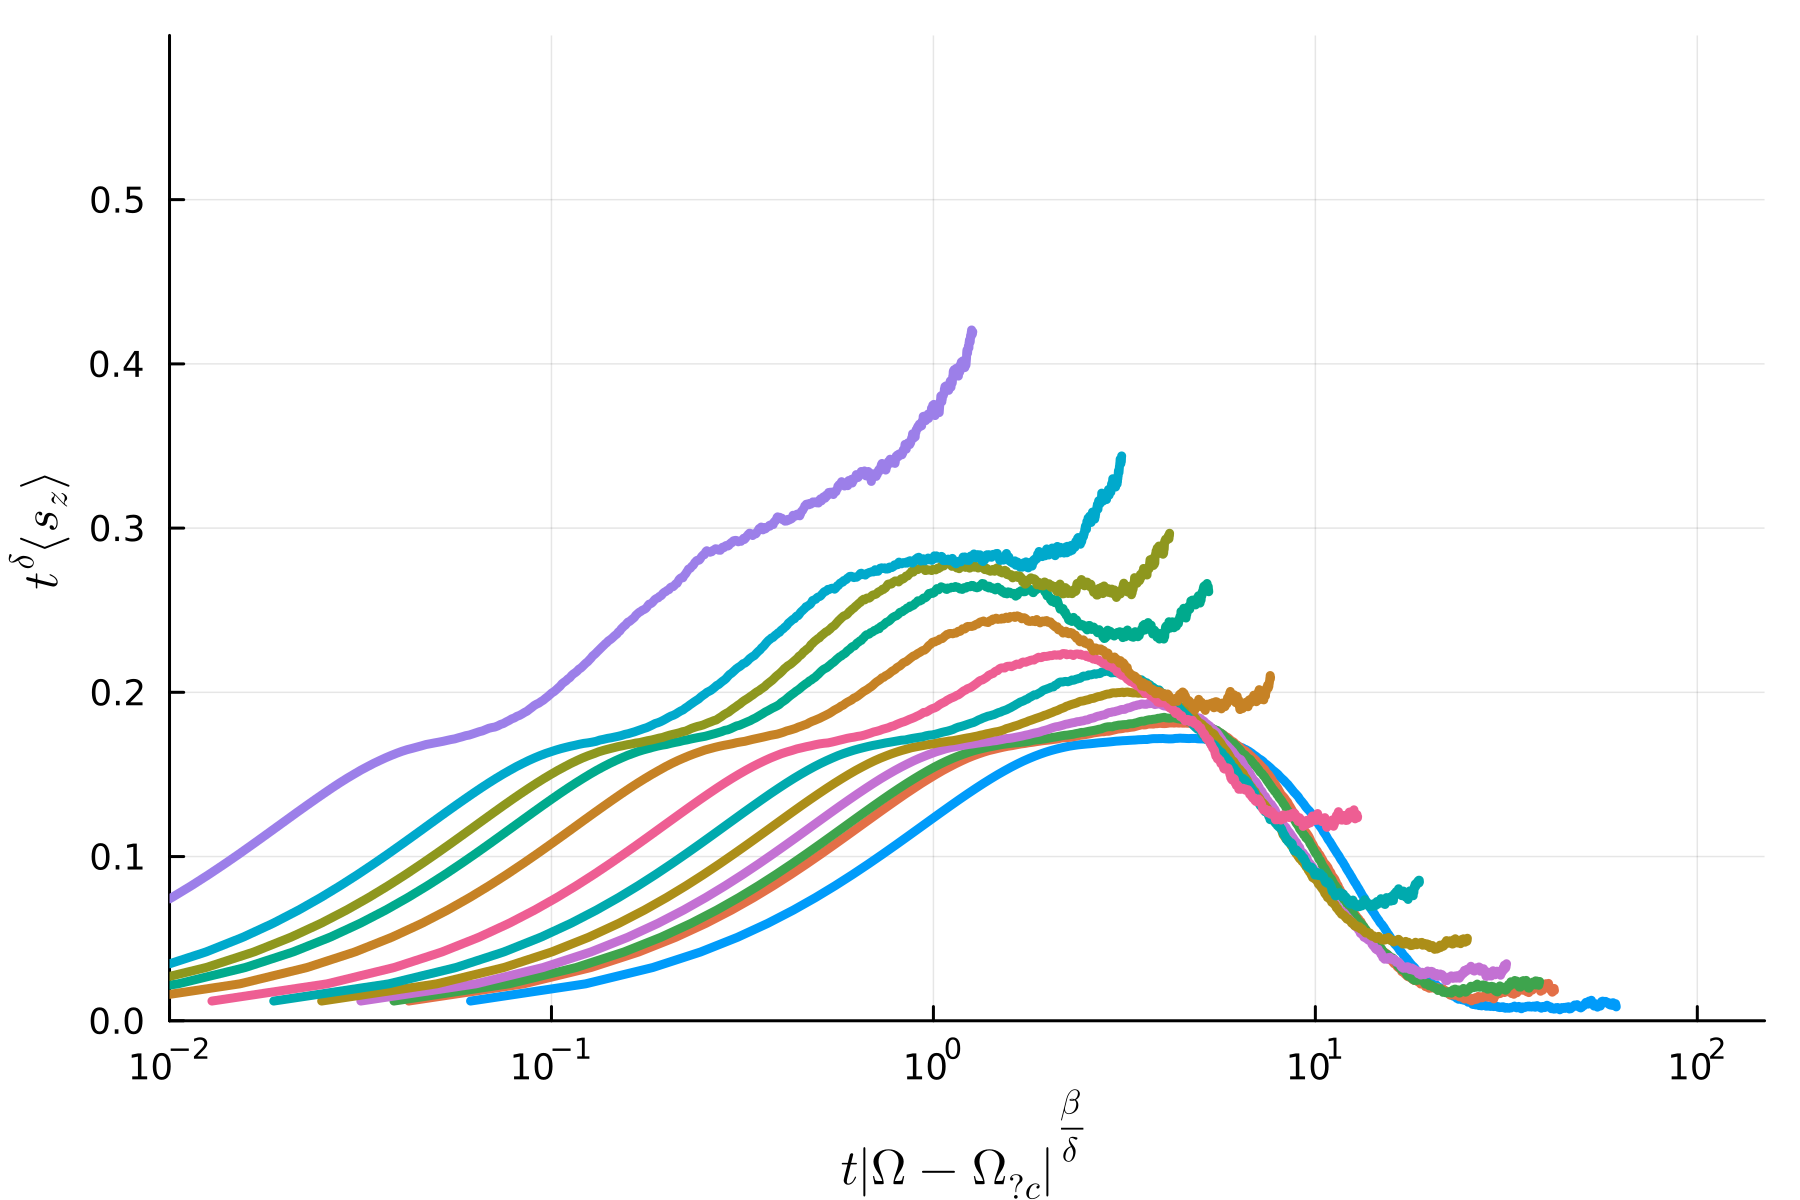

In [297]:
Ω_crit = 6.5
p5 = plot(
    xscale=:log10,#yscale=:ln,
    xlim=[0.01, 150],ylim=[0, 0.6],
    legend=false)
for Ω in MyParams.Ω_values
    if Ω in (4.5,5,5.1,5.3,5.5,5.7,5.9,6.1,6.2,6.25,6.3,6.4,6.5)
        data = data_dict[Ω]
        t = data["t"]
        sz_mean_mean = vec(data["sz_mean_mean"])
        plot!(
            p5,t .* abs.(Ω - Ω_crit).^(MyParams.beta / MyParams.delta),
            t .* MyParams.delta .* sz_mean_mean .+ 1e-3,label="Ω=$(Ω)",linewidth=3
        )
    end
end
xlabel!(p5, L"t |\Omega - \Omega_{\text{c}}|^{\frac{\beta}{\delta}}")
ylabel!(p5, L"t^\delta \langle s_z \rangle")
display(p5)

Omega vs. sz

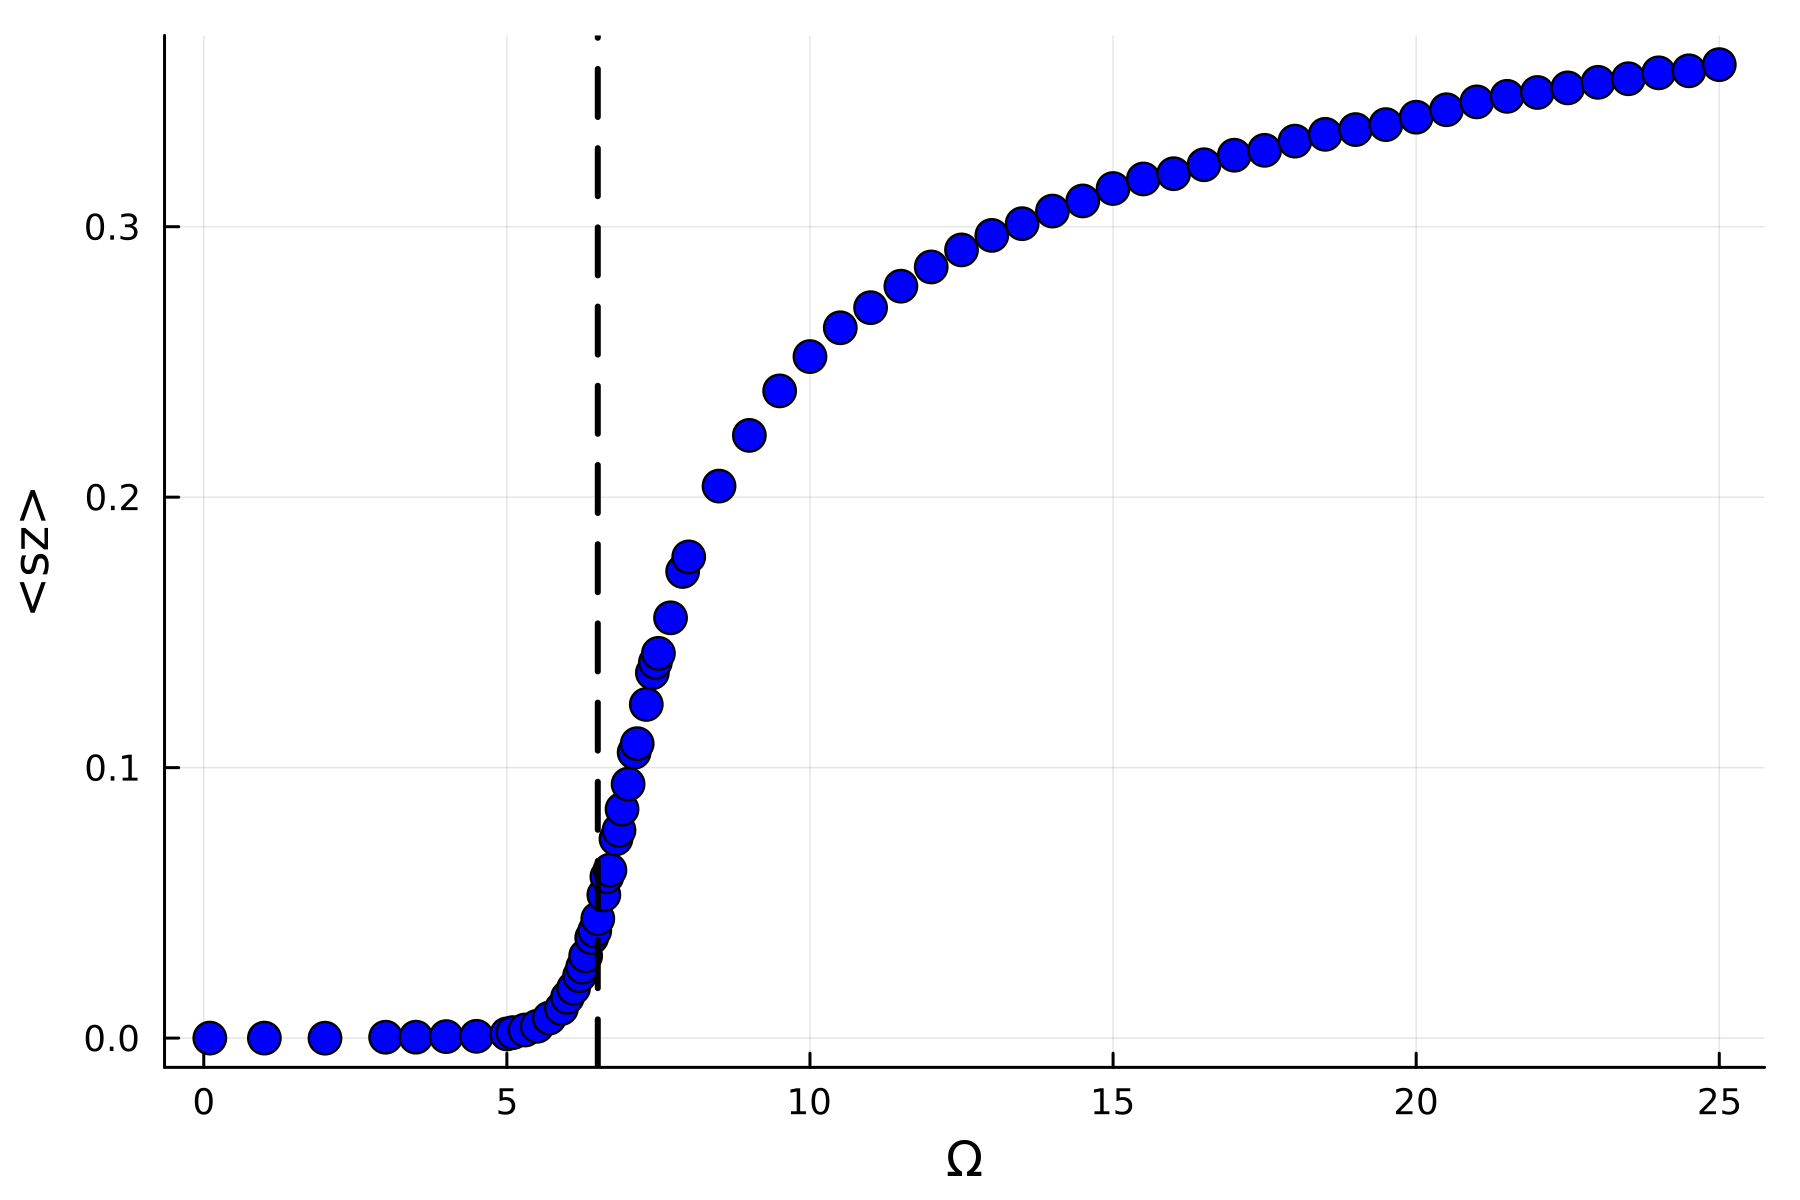

"/amd/home/agfleischhauer/quw51vuk/ResearchProj/TWA/Rydberg_facilitation/plots/steady_state_rydberg_density_2D,400 atoms, γ = 20, Δ = 400.png"

In [ ]:
p2 = plot()
final_sz_values = Float64[]
Ωvalues = Float64[]

for Ω in MyParams.Ω_values
    if Ω in (0.1,1,2,3,3.5,4,4.5,5,5.1,5.3,5.5,5.7,5.9,6,6.1,6.2,6.25,6.3,
        6.4,6.45,6.5,6.6,6.65,6.7,6.8,6.85,6.9,7,7.1,7.15,7.3,7.4,7.45,7.5,7.7,
        7.9,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,
        17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25)
        data = data_dict[Ω]
        t = data["t"]
        sz_mean_mean = vec(data["sz_mean_mean"])
        push!(final_sz_values, last(sz_mean_mean))
        push!(Ωvalues, Ω)
    end
end
scatter!(
    Ωvalues, final_sz_values,
    xlabel="Ω", 
    ylabel="<sz>",
    marker=:circle, markersize=6, color=:blue,
    linestyle=:auto, legend=:topright, label=false
)
vline!([Ω_crit], color=:black, linestyle=:dash, linewidth=2,label=false)
display(p2)
savefig("plots/steady_state_rydberg_density_$(MyParams.case)D,$(MyParams.nAtoms) atoms, γ = $(MyParams.γ), Δ = $(MyParams.Δ).png")


ln|Ω_values .- Ω_crit| vs. ln(<'Sz'>)

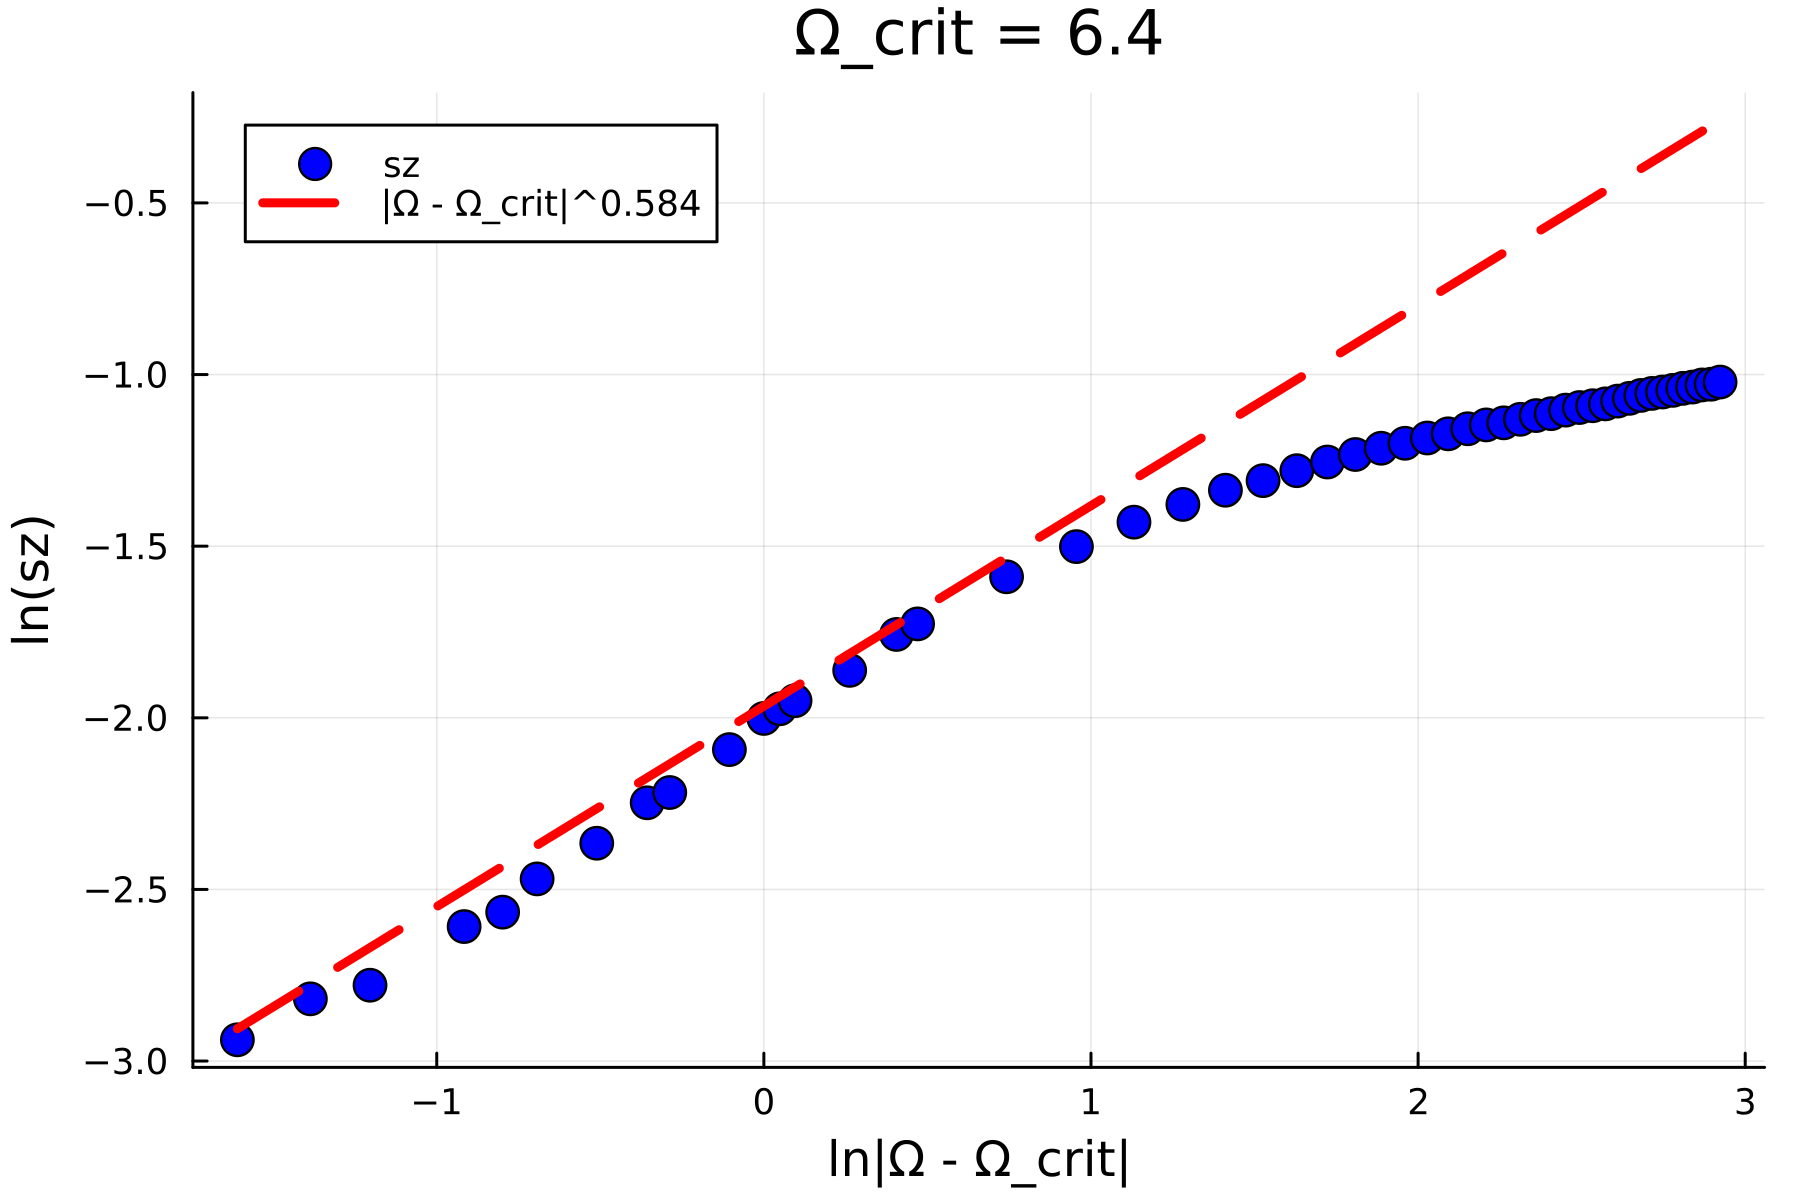

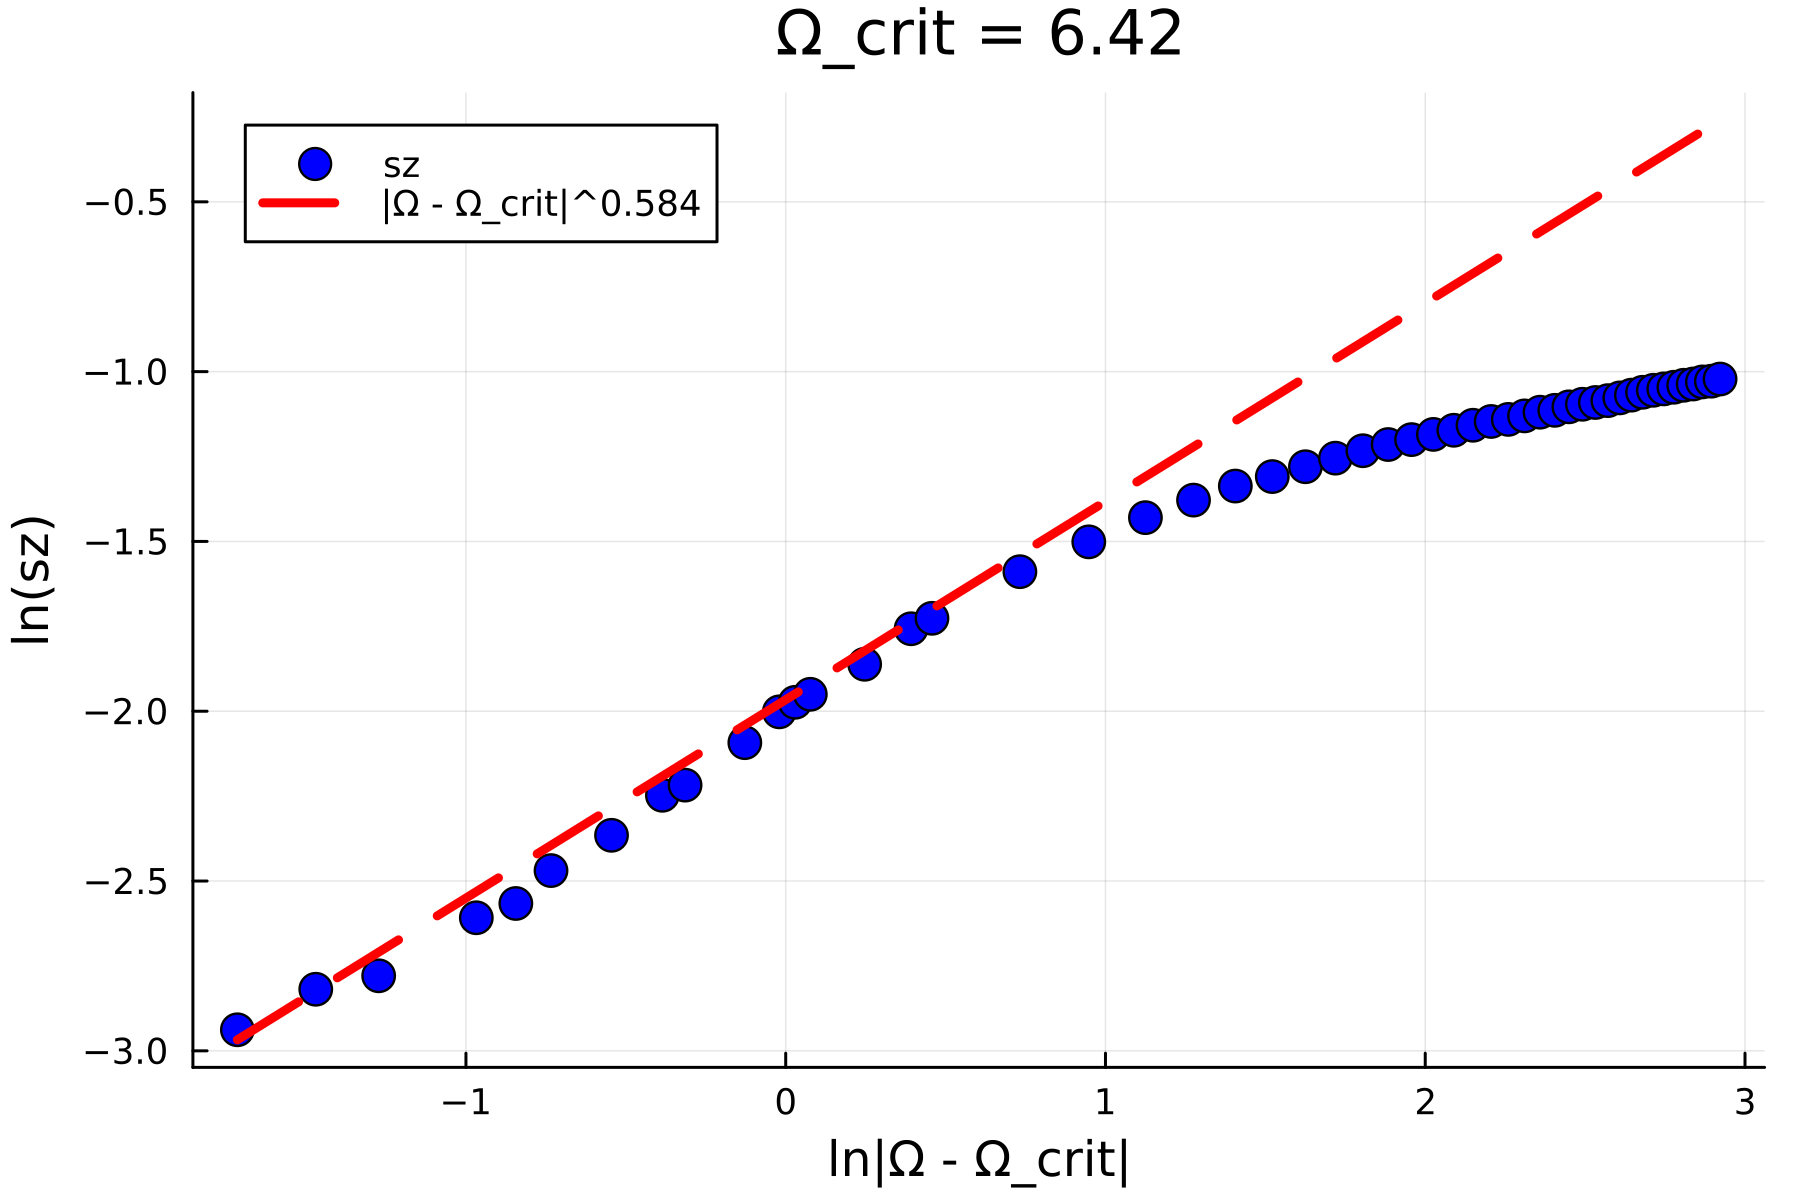

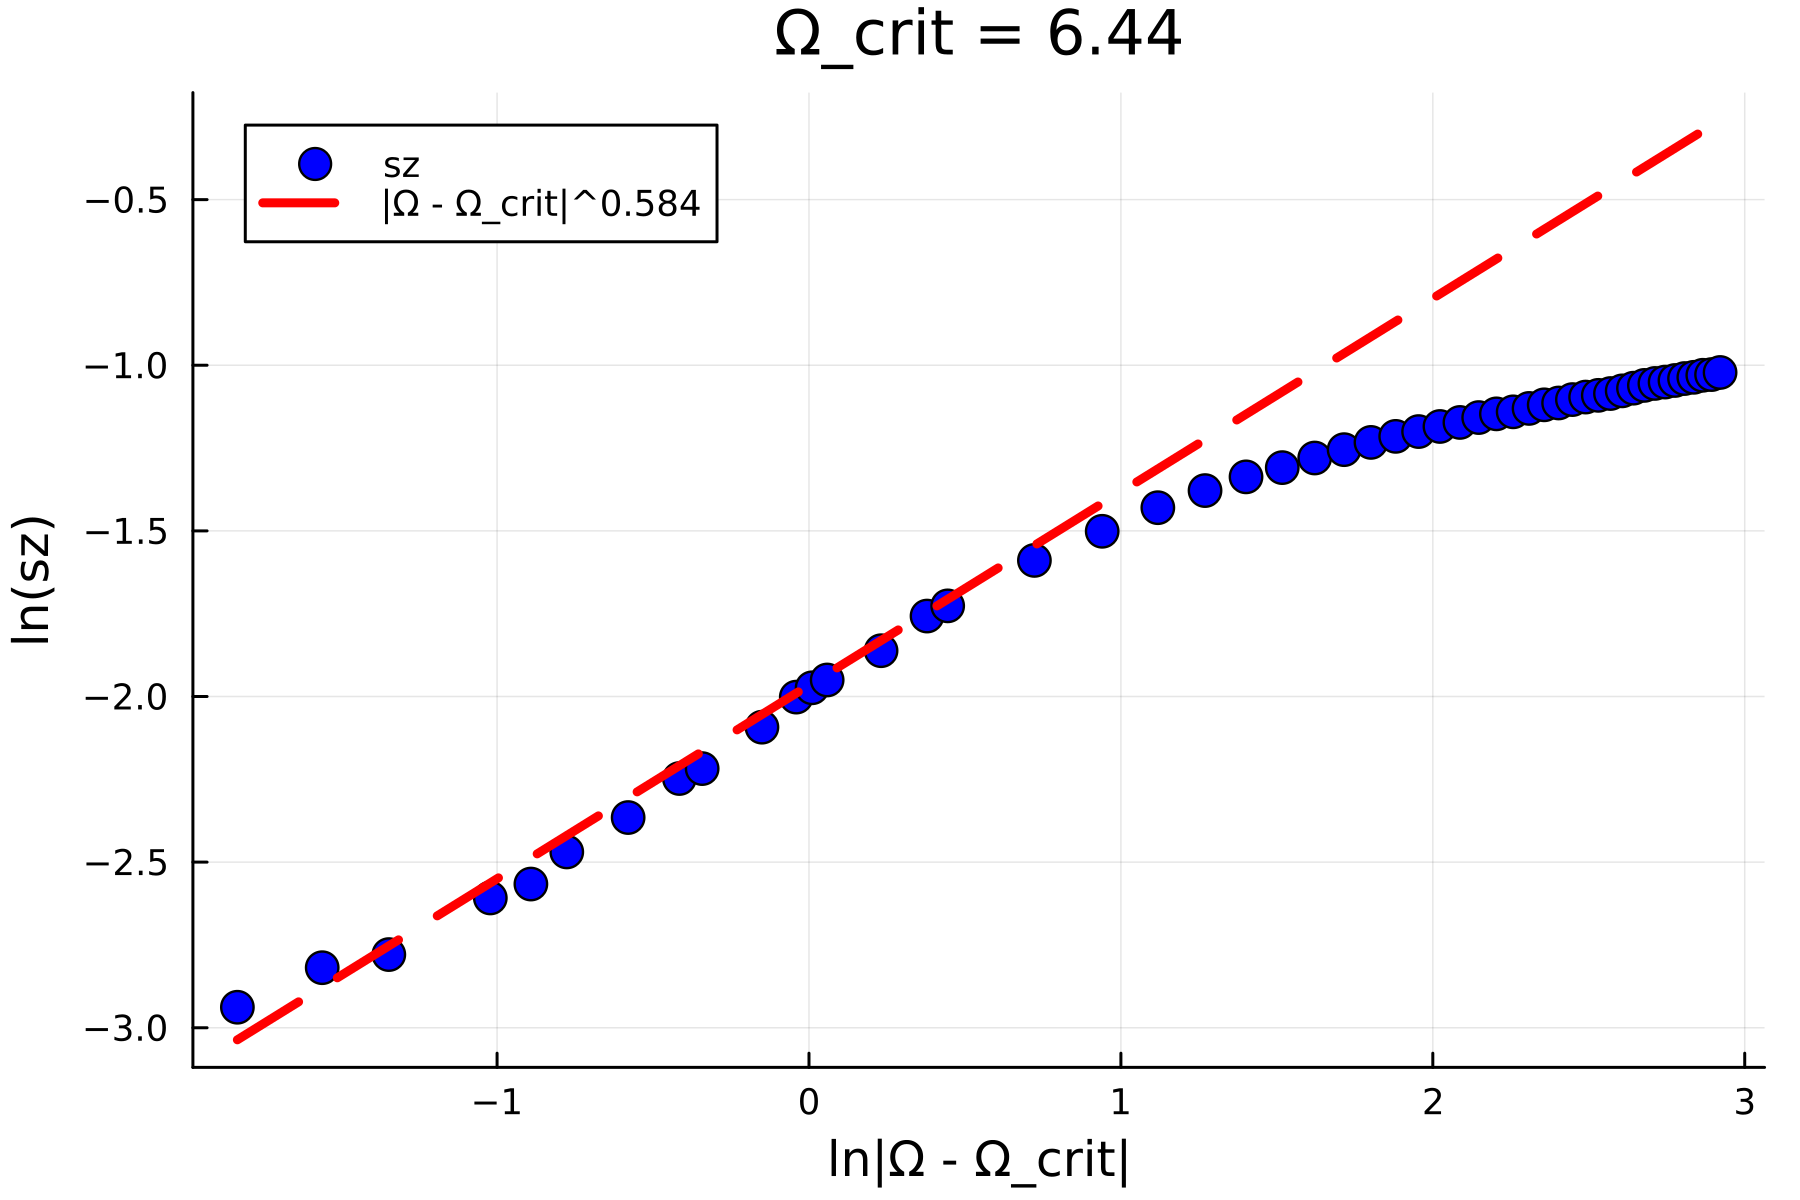

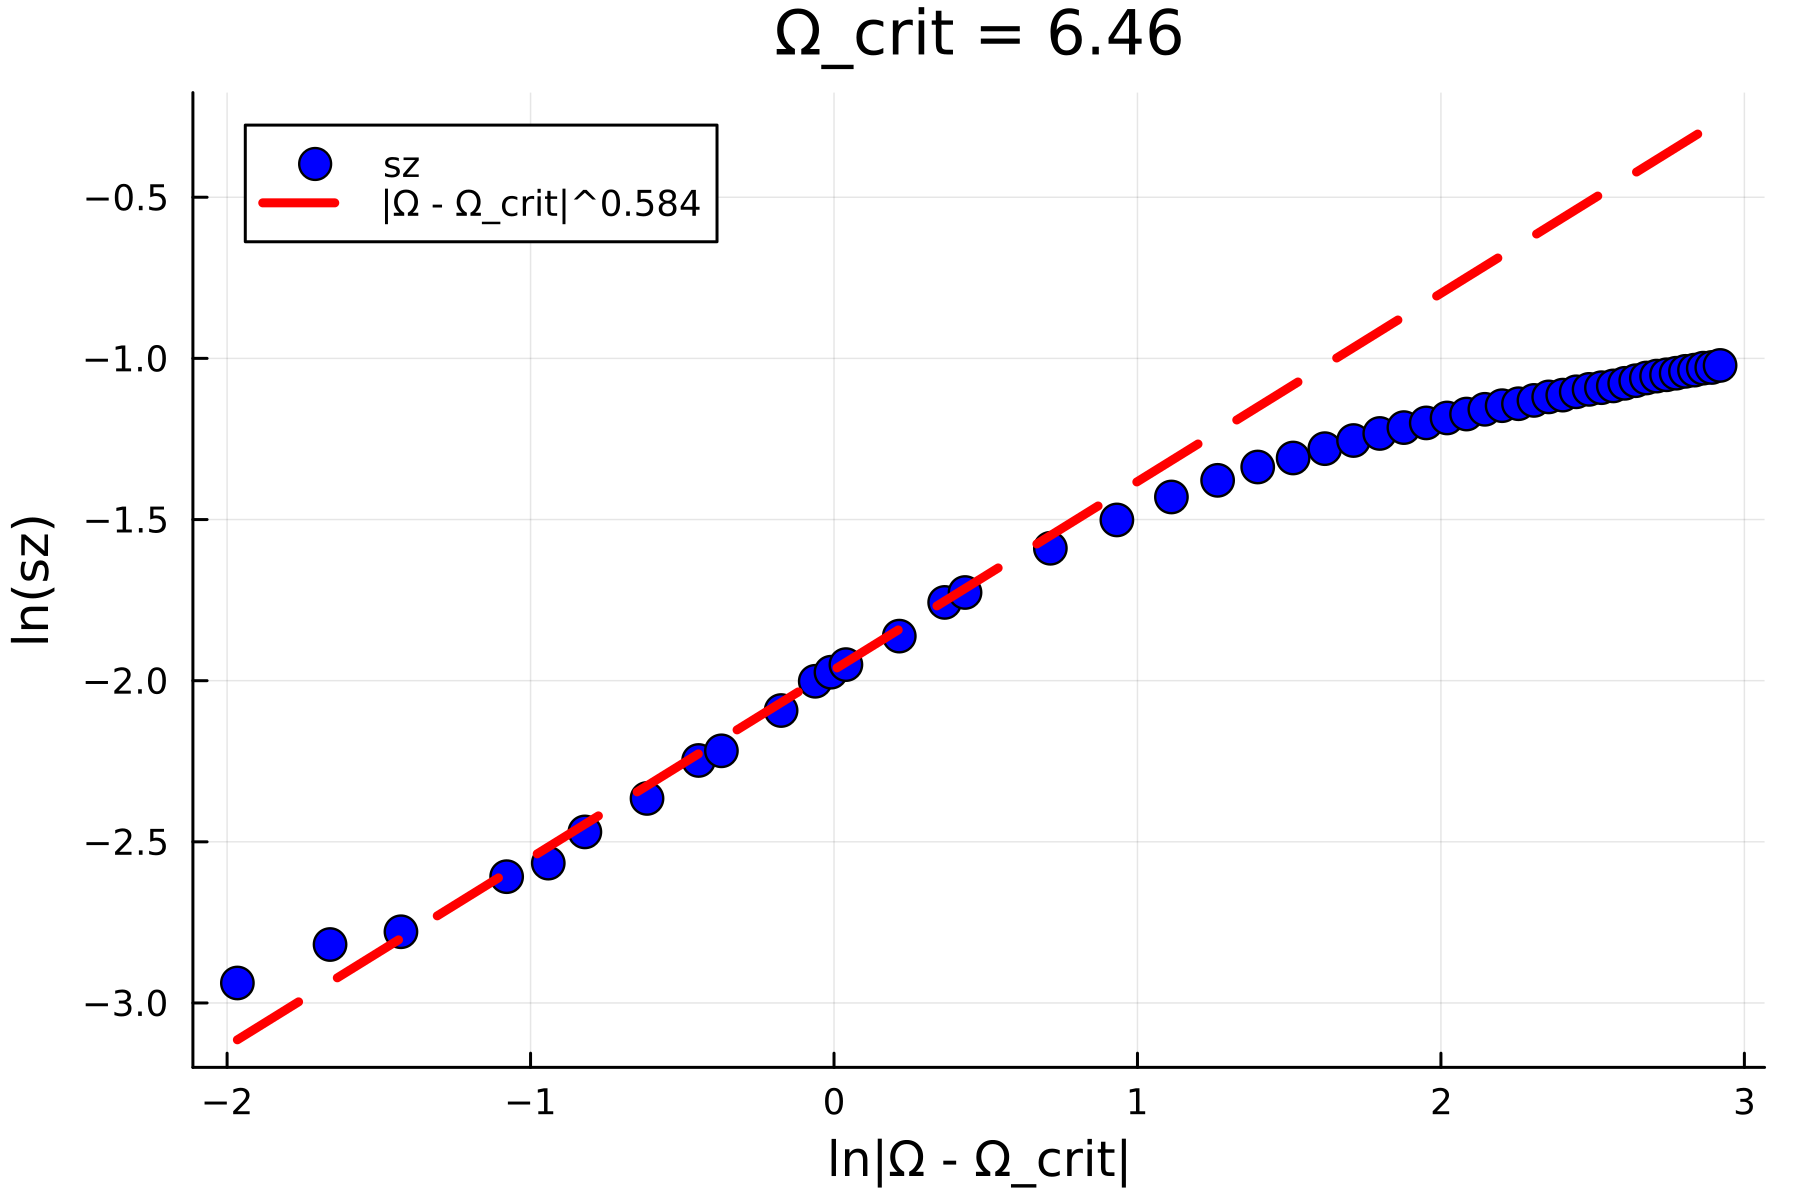

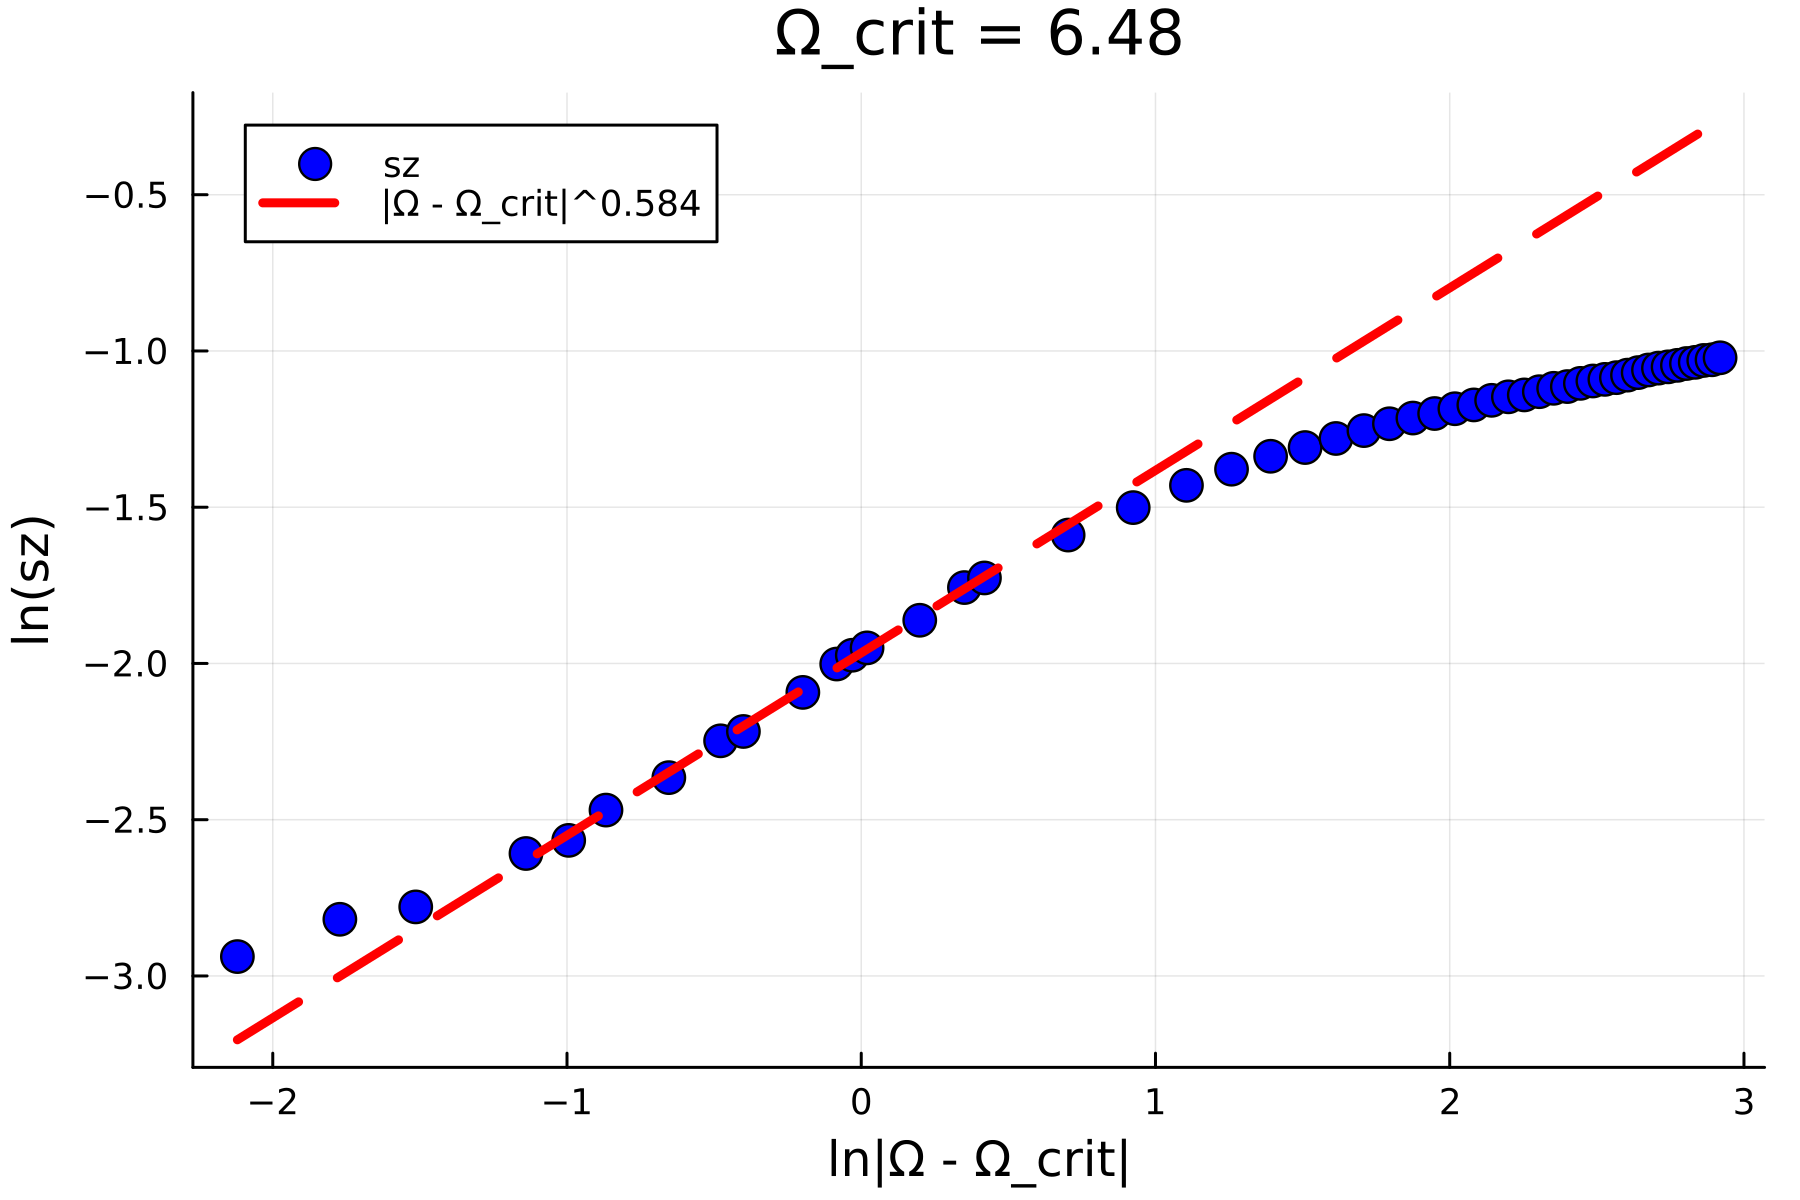

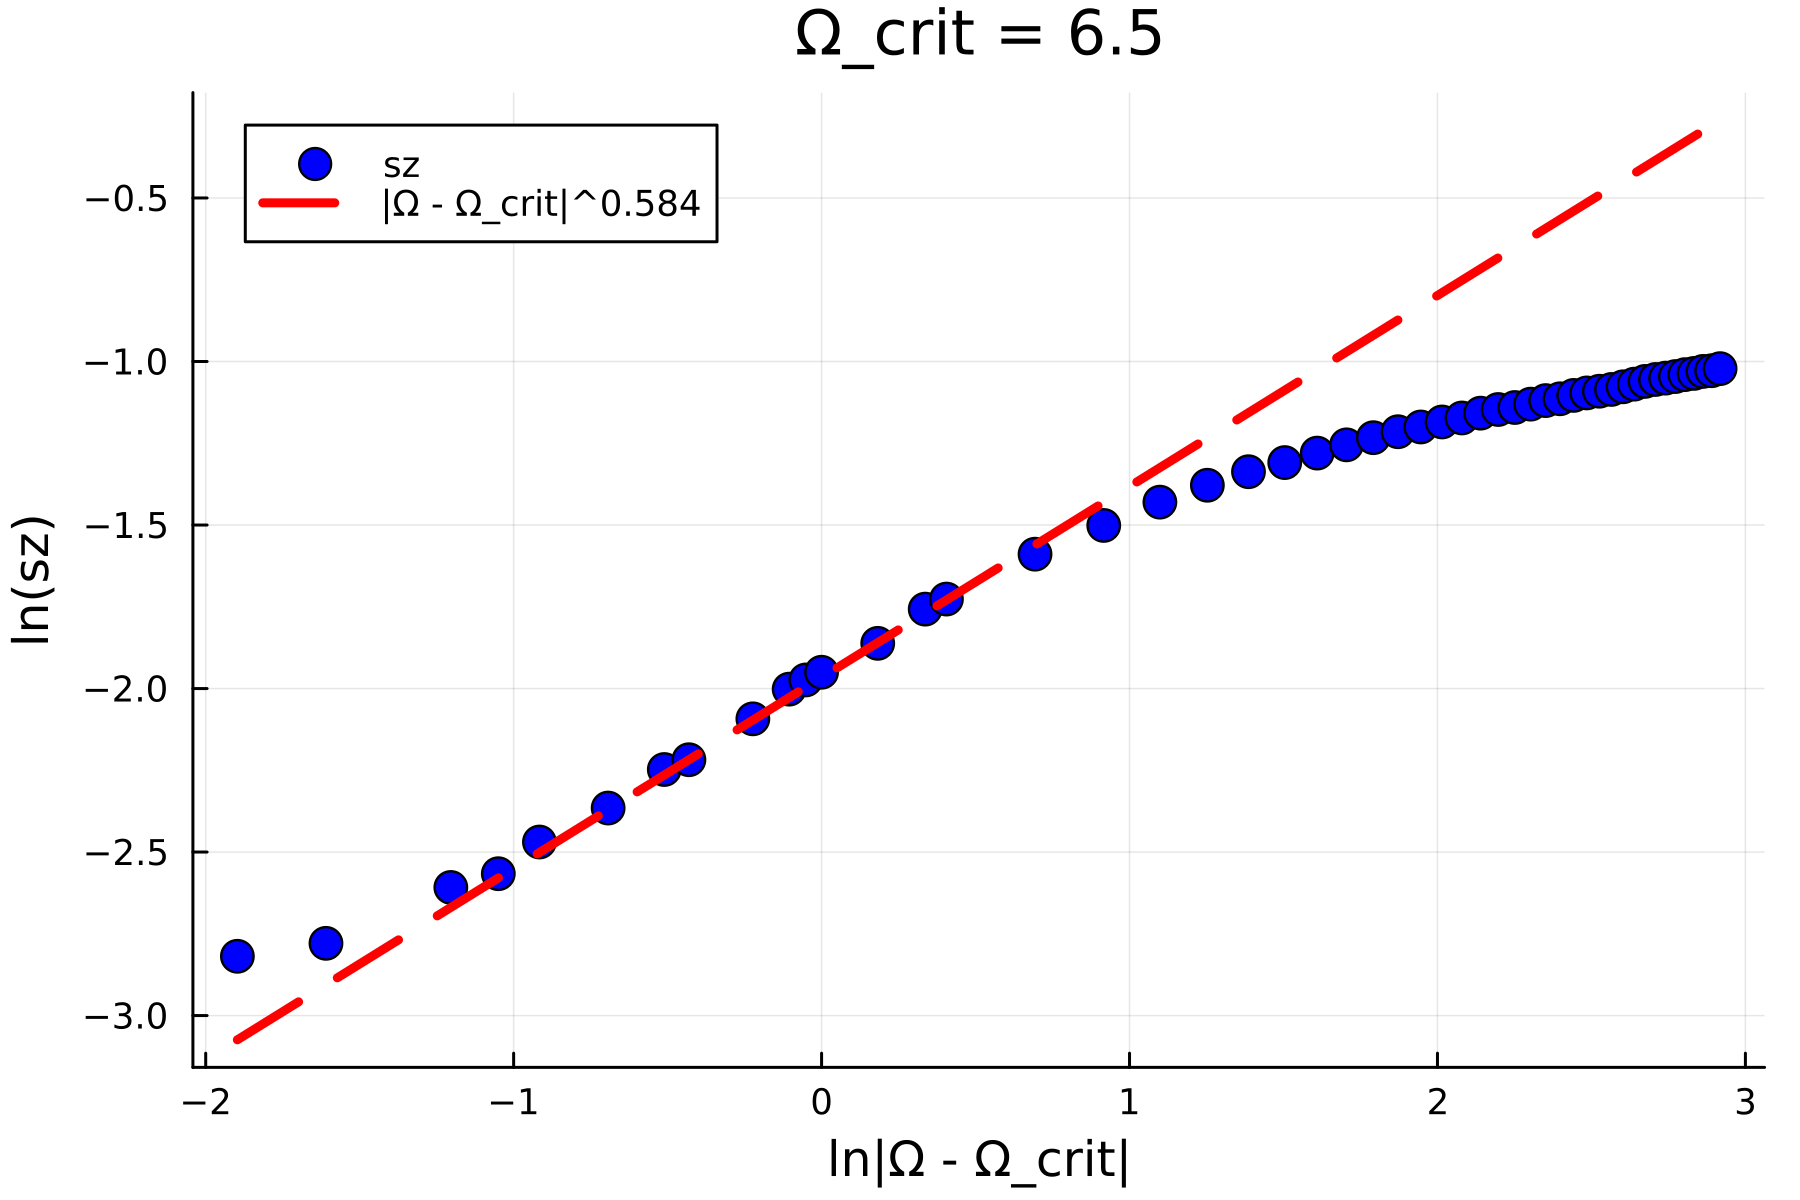

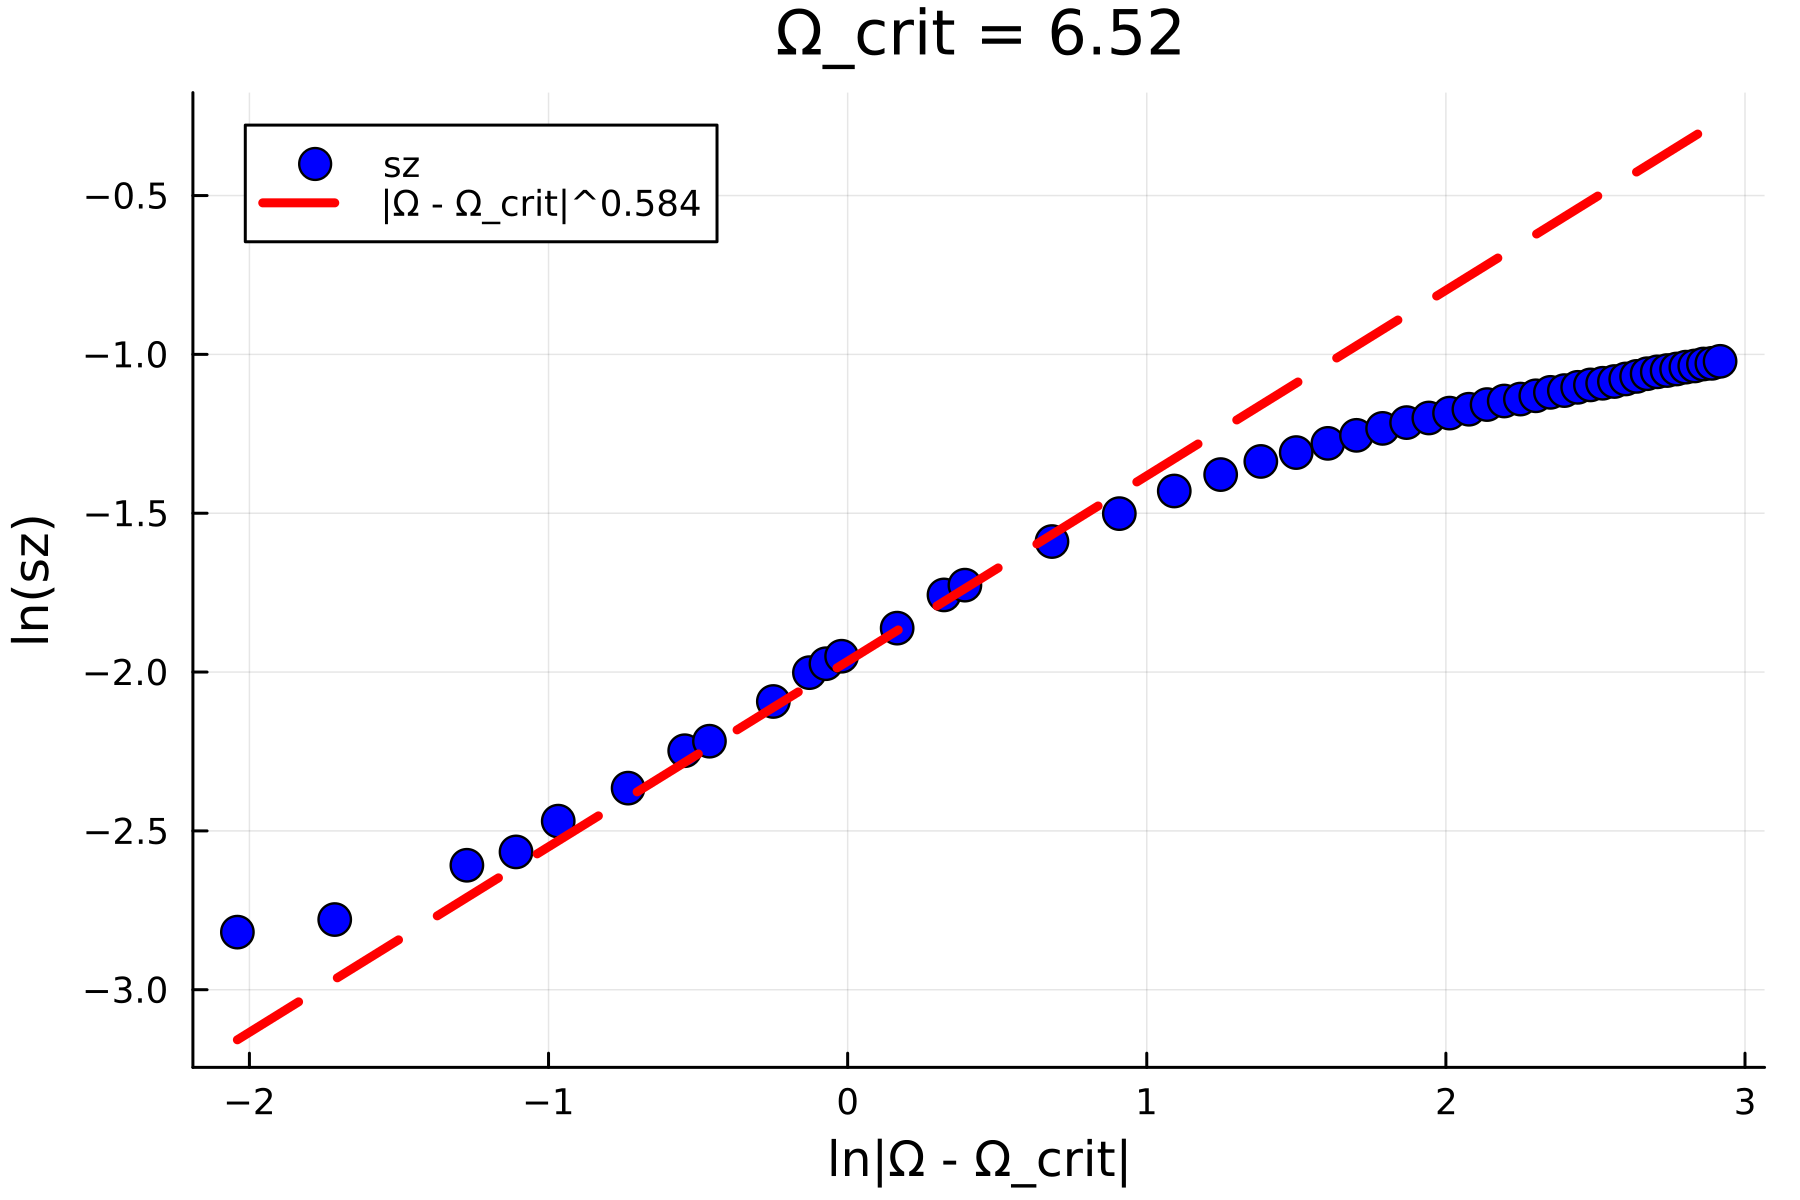

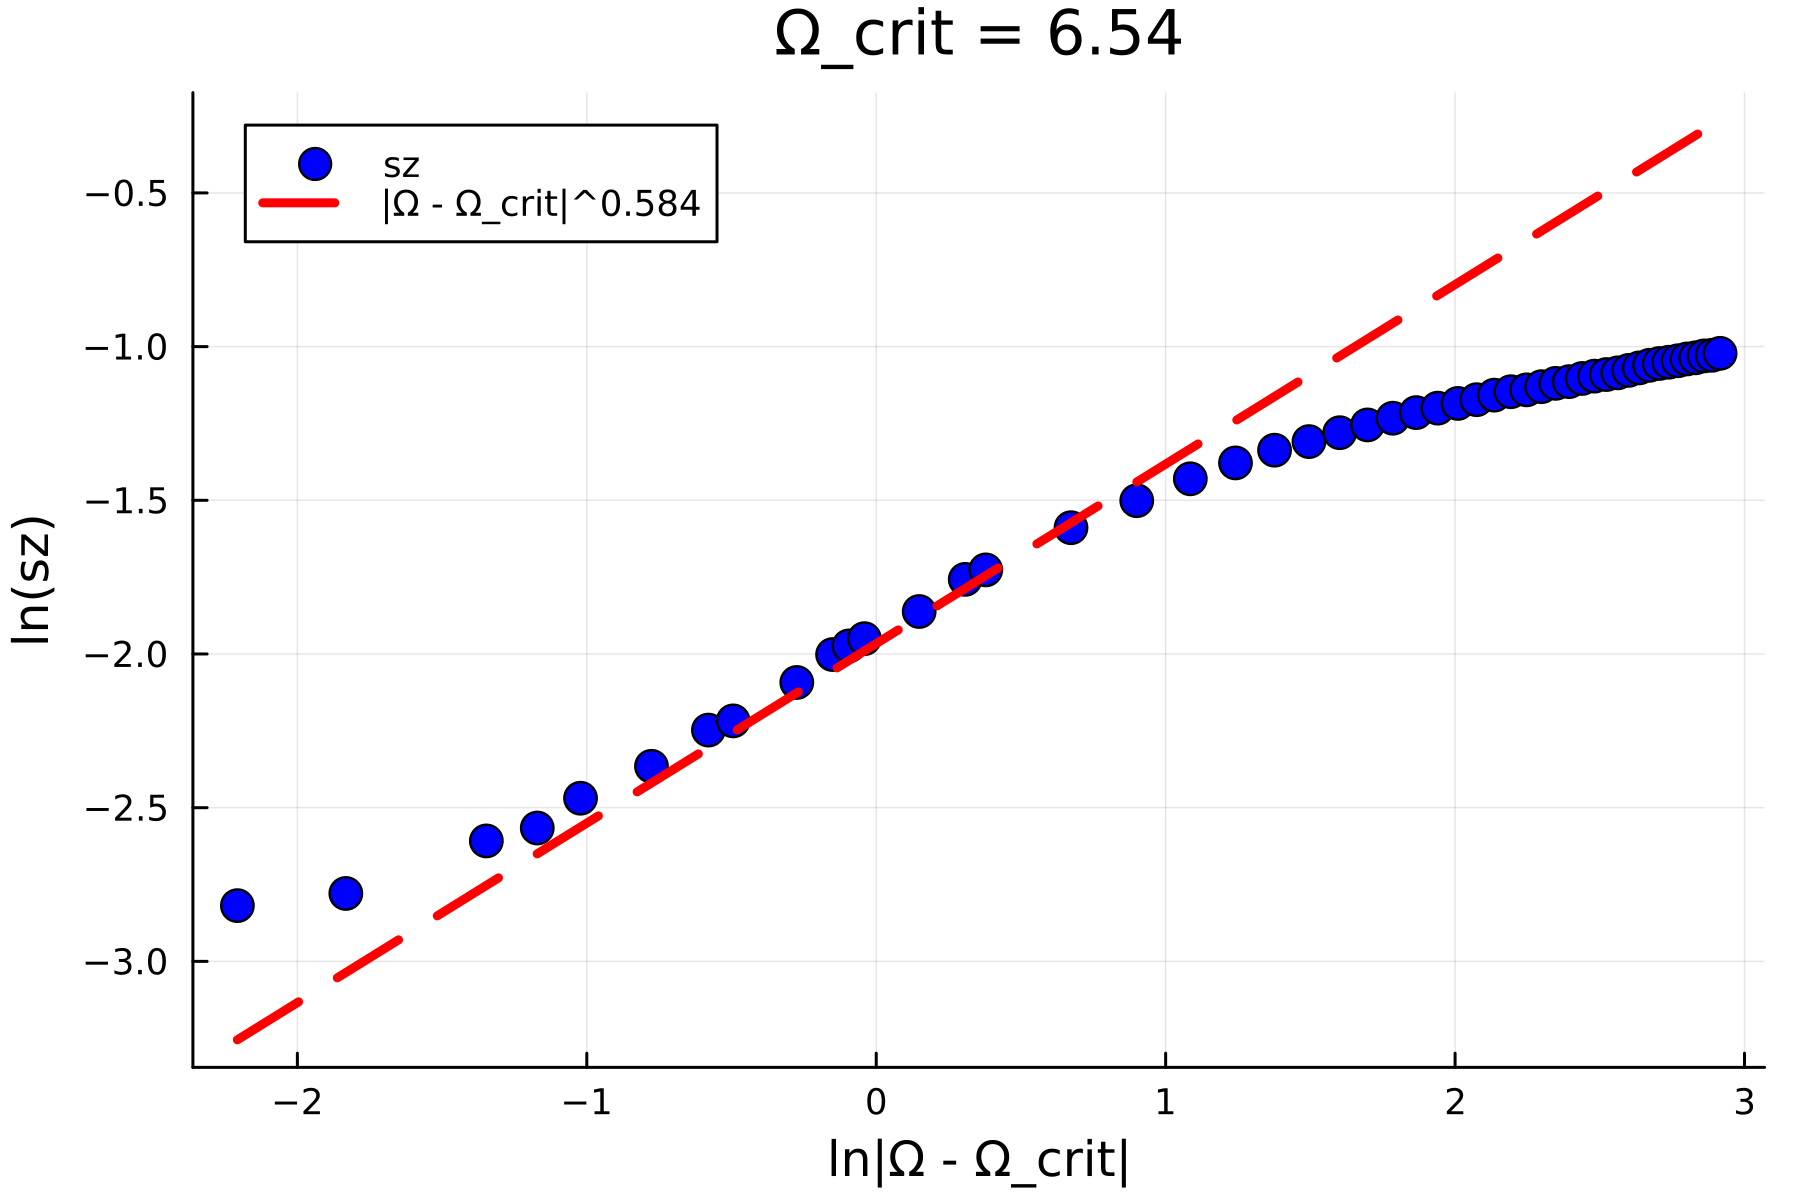

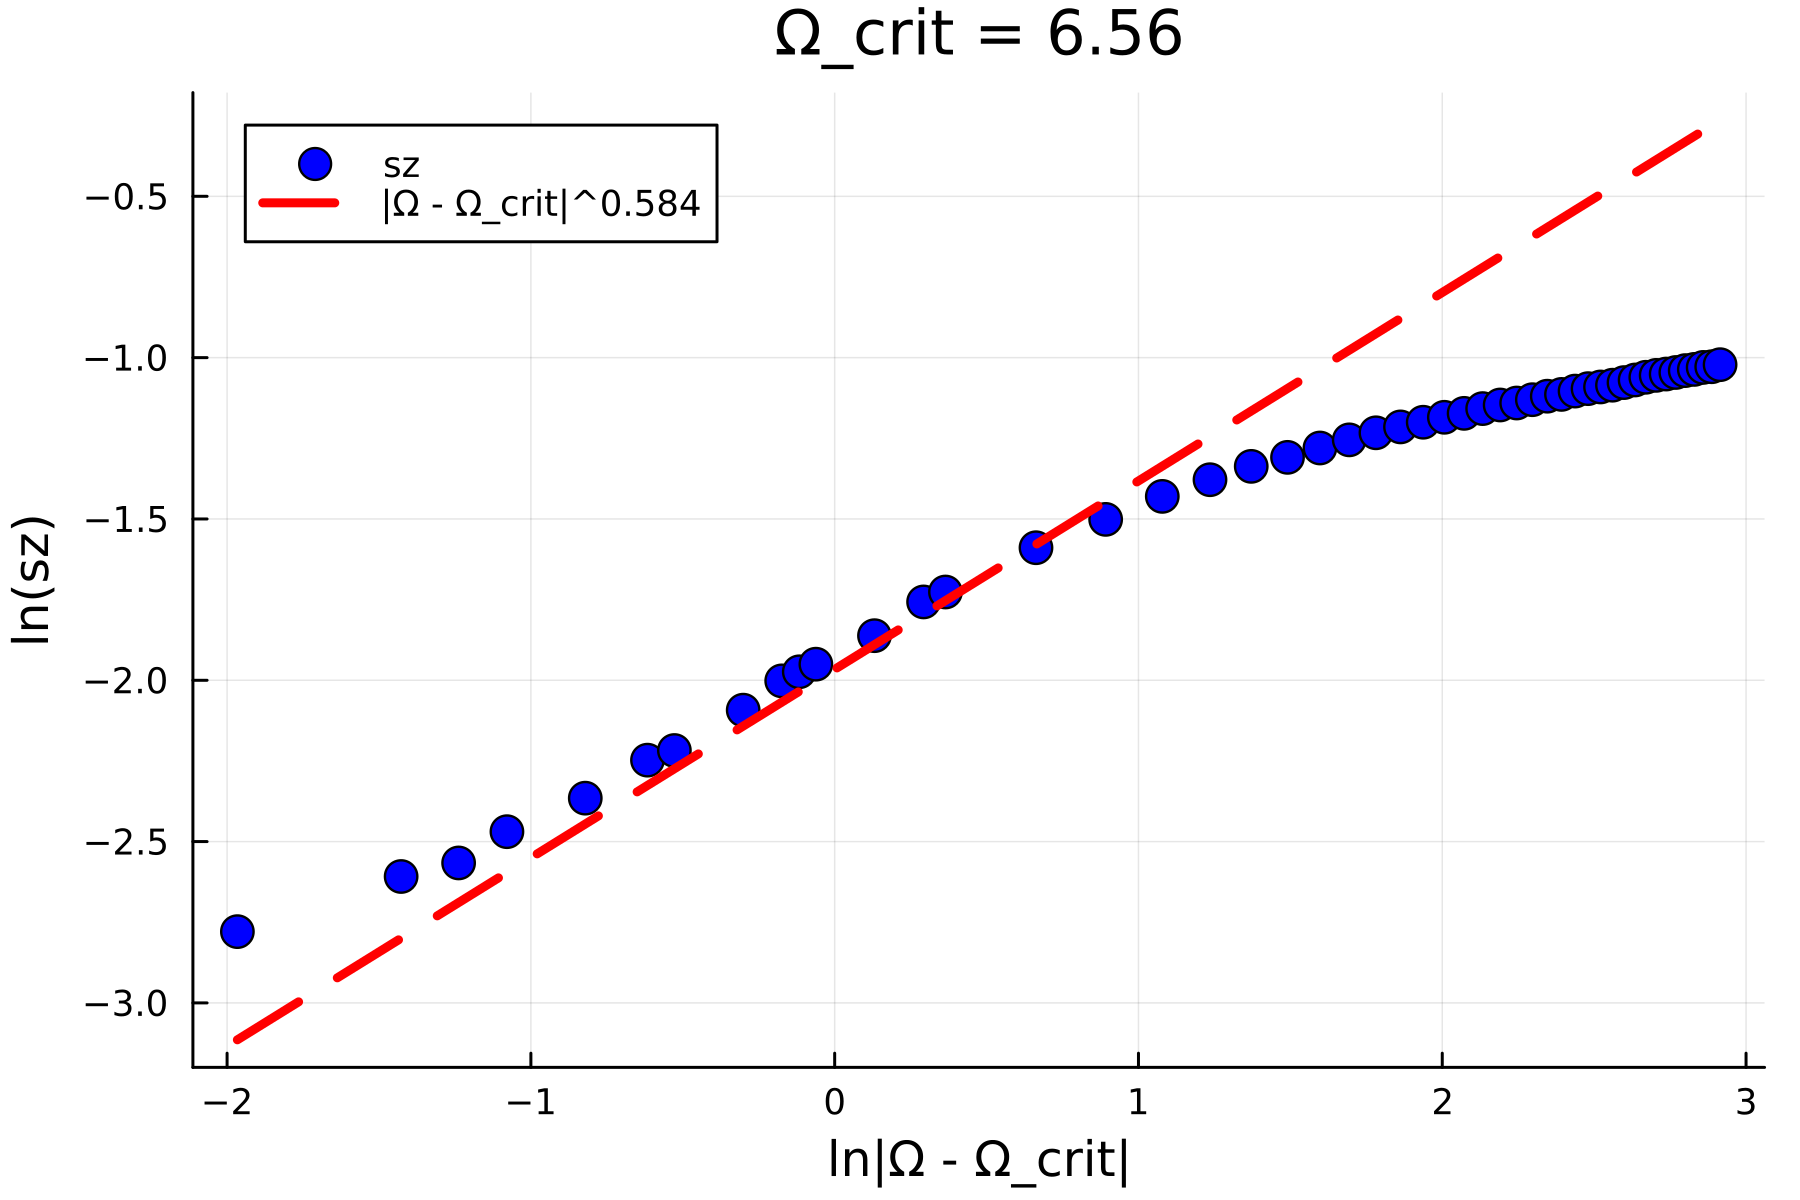

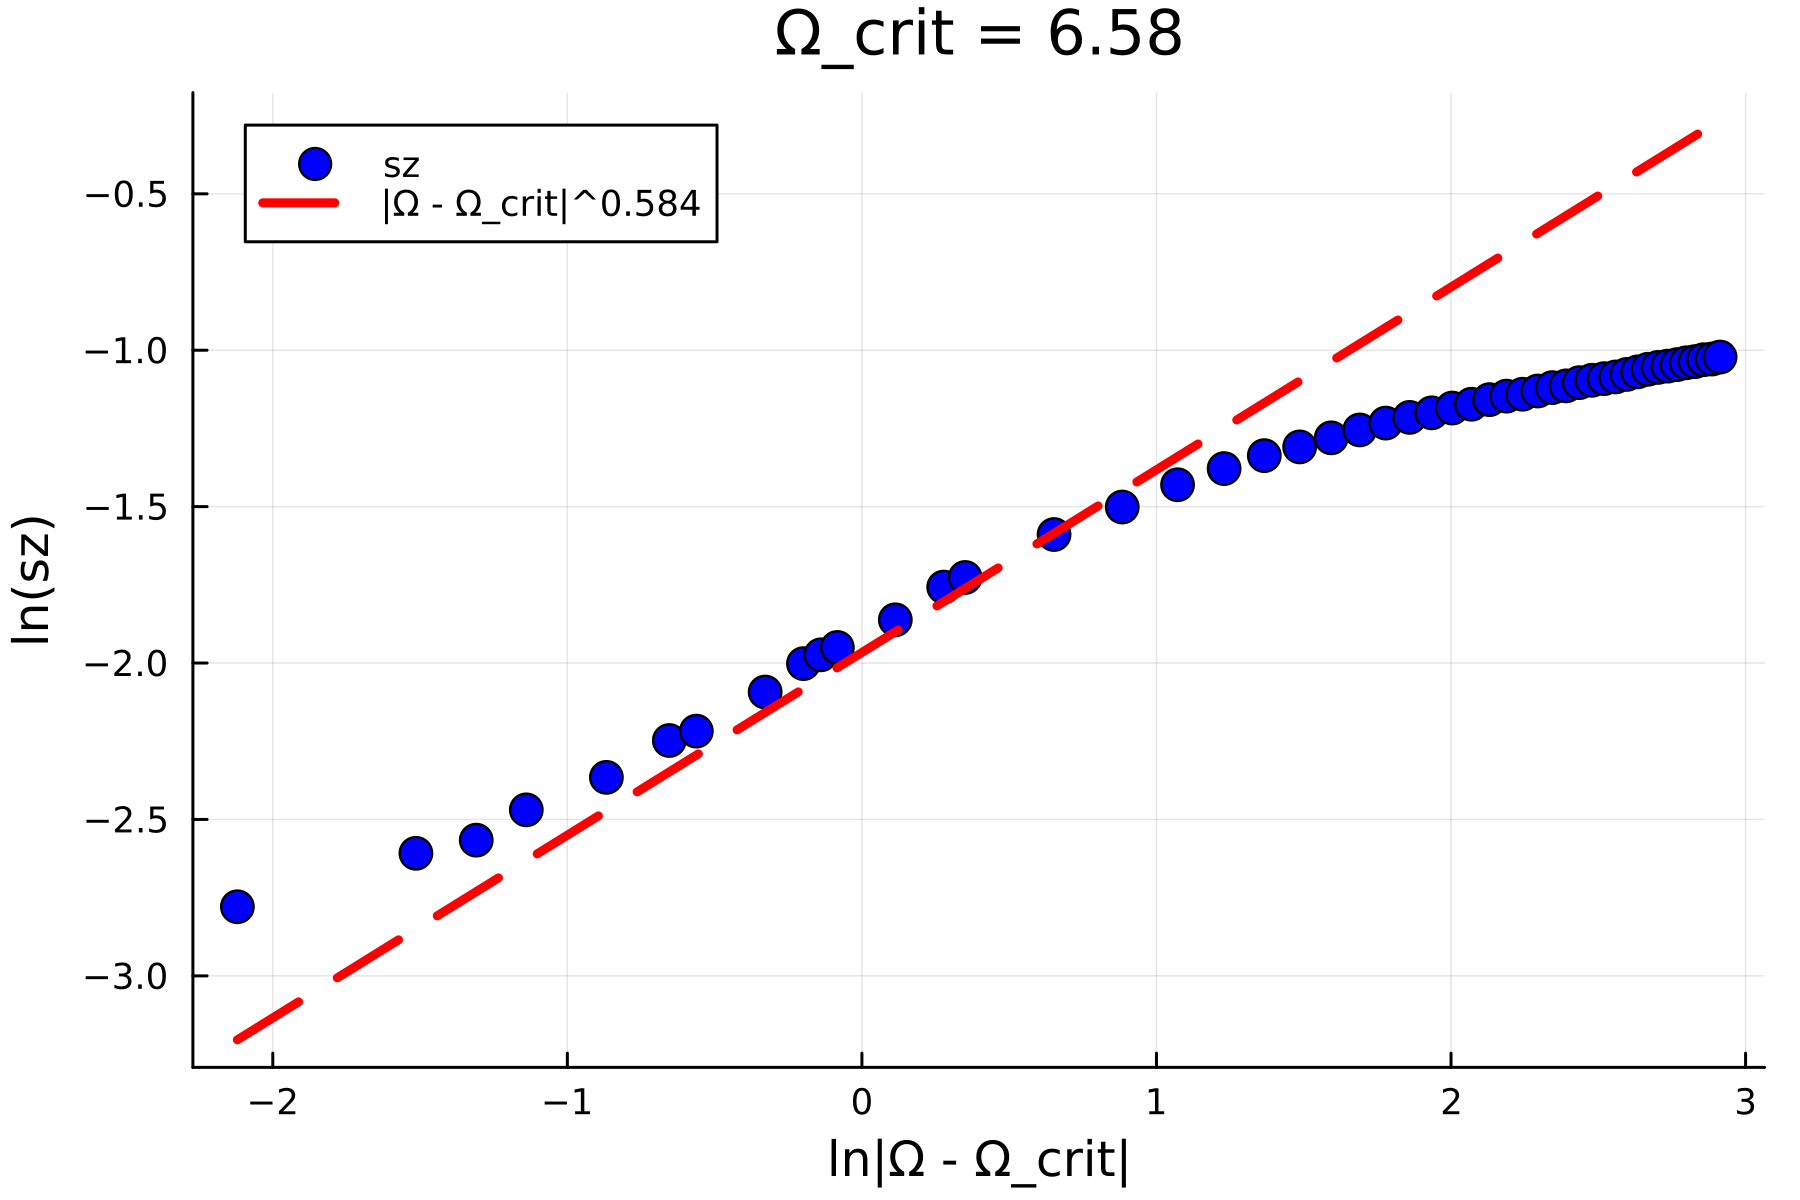

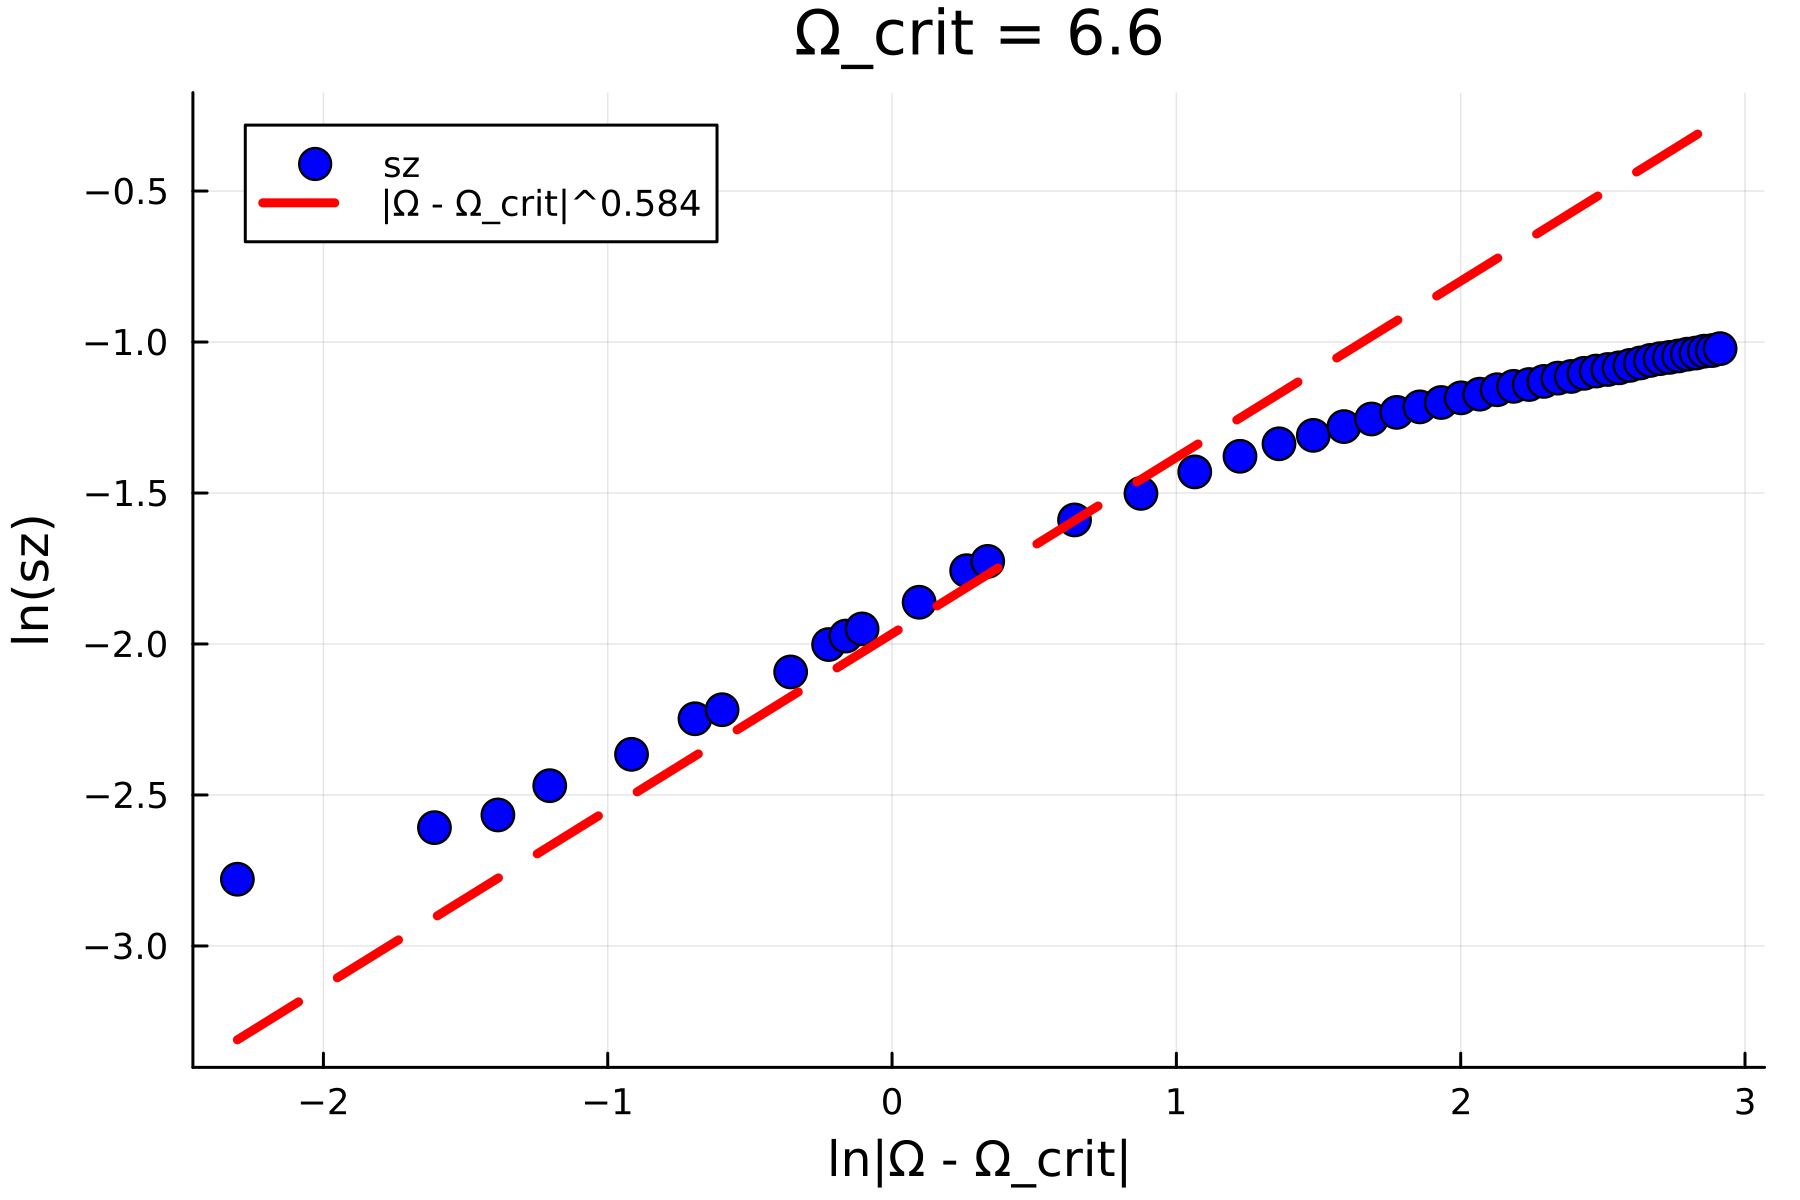

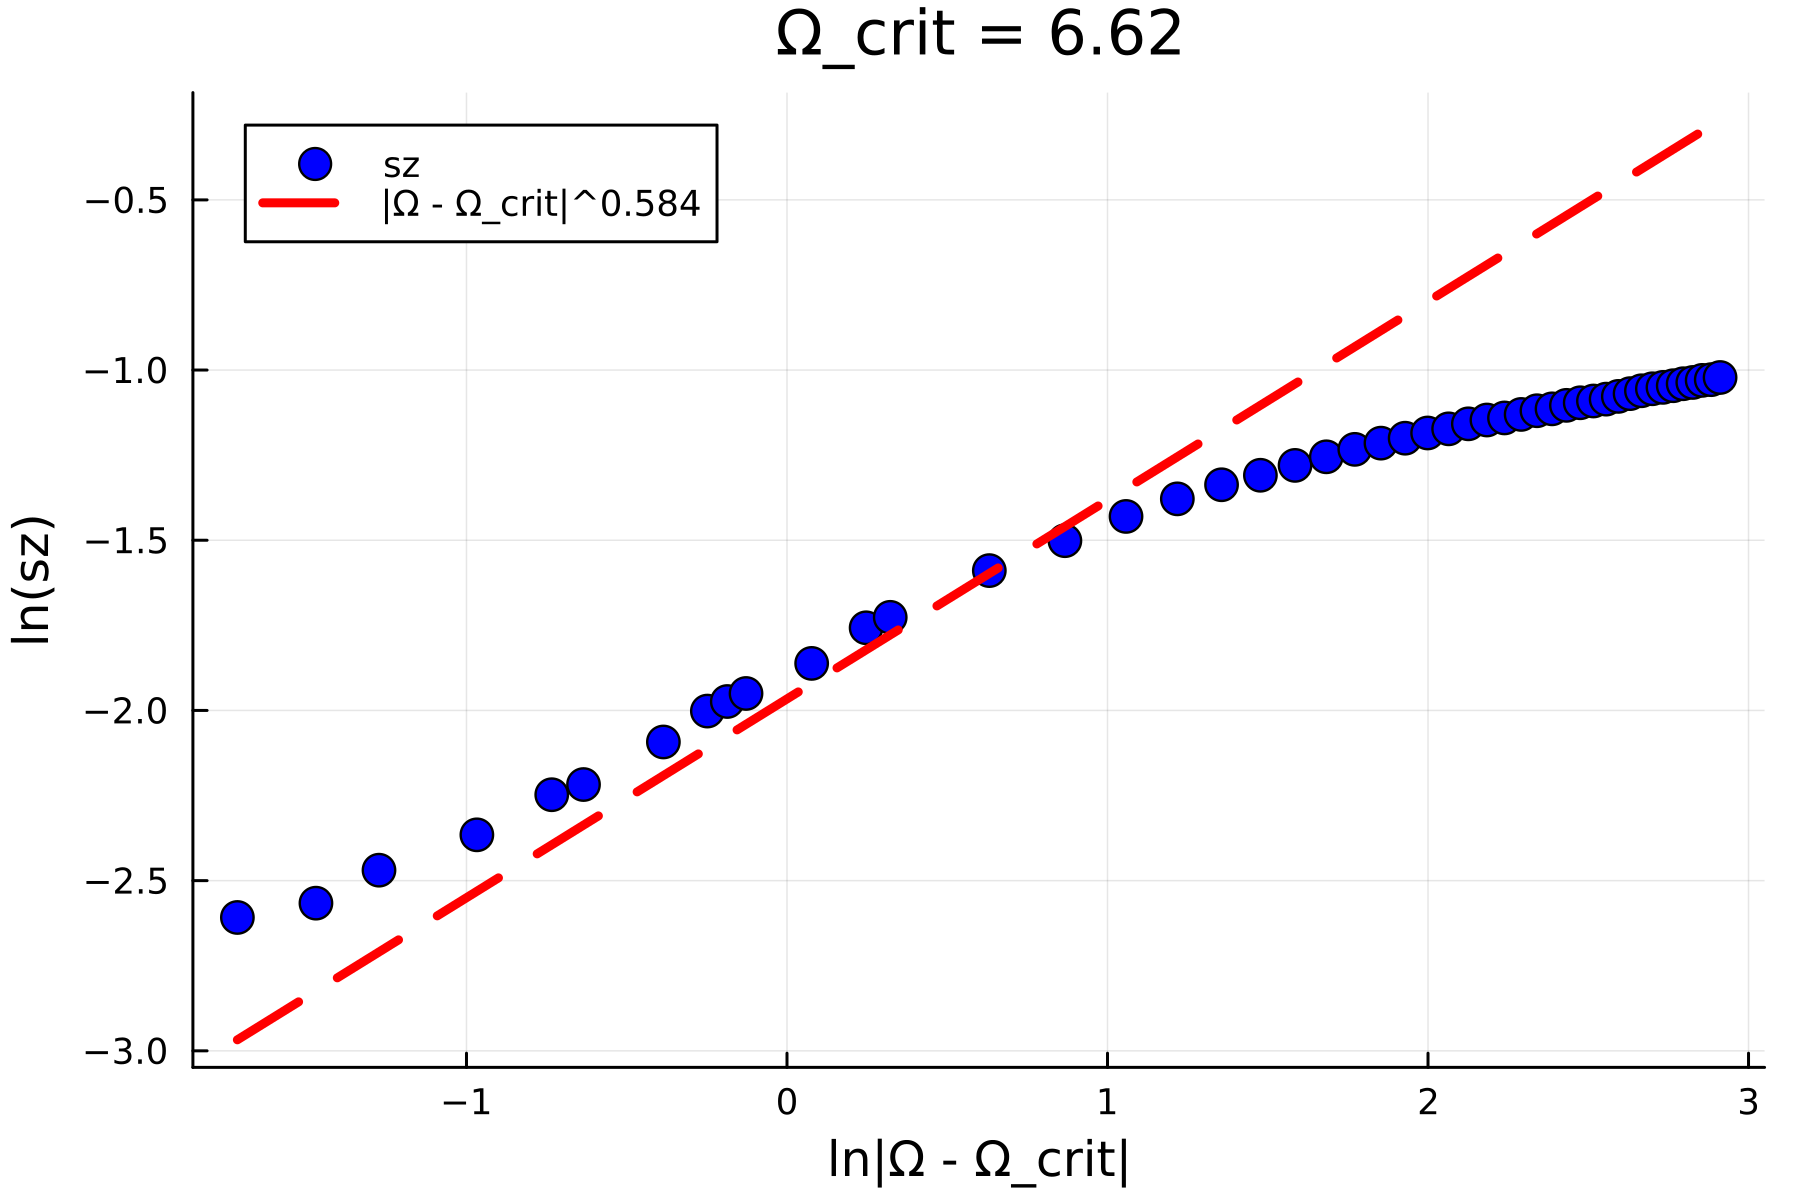

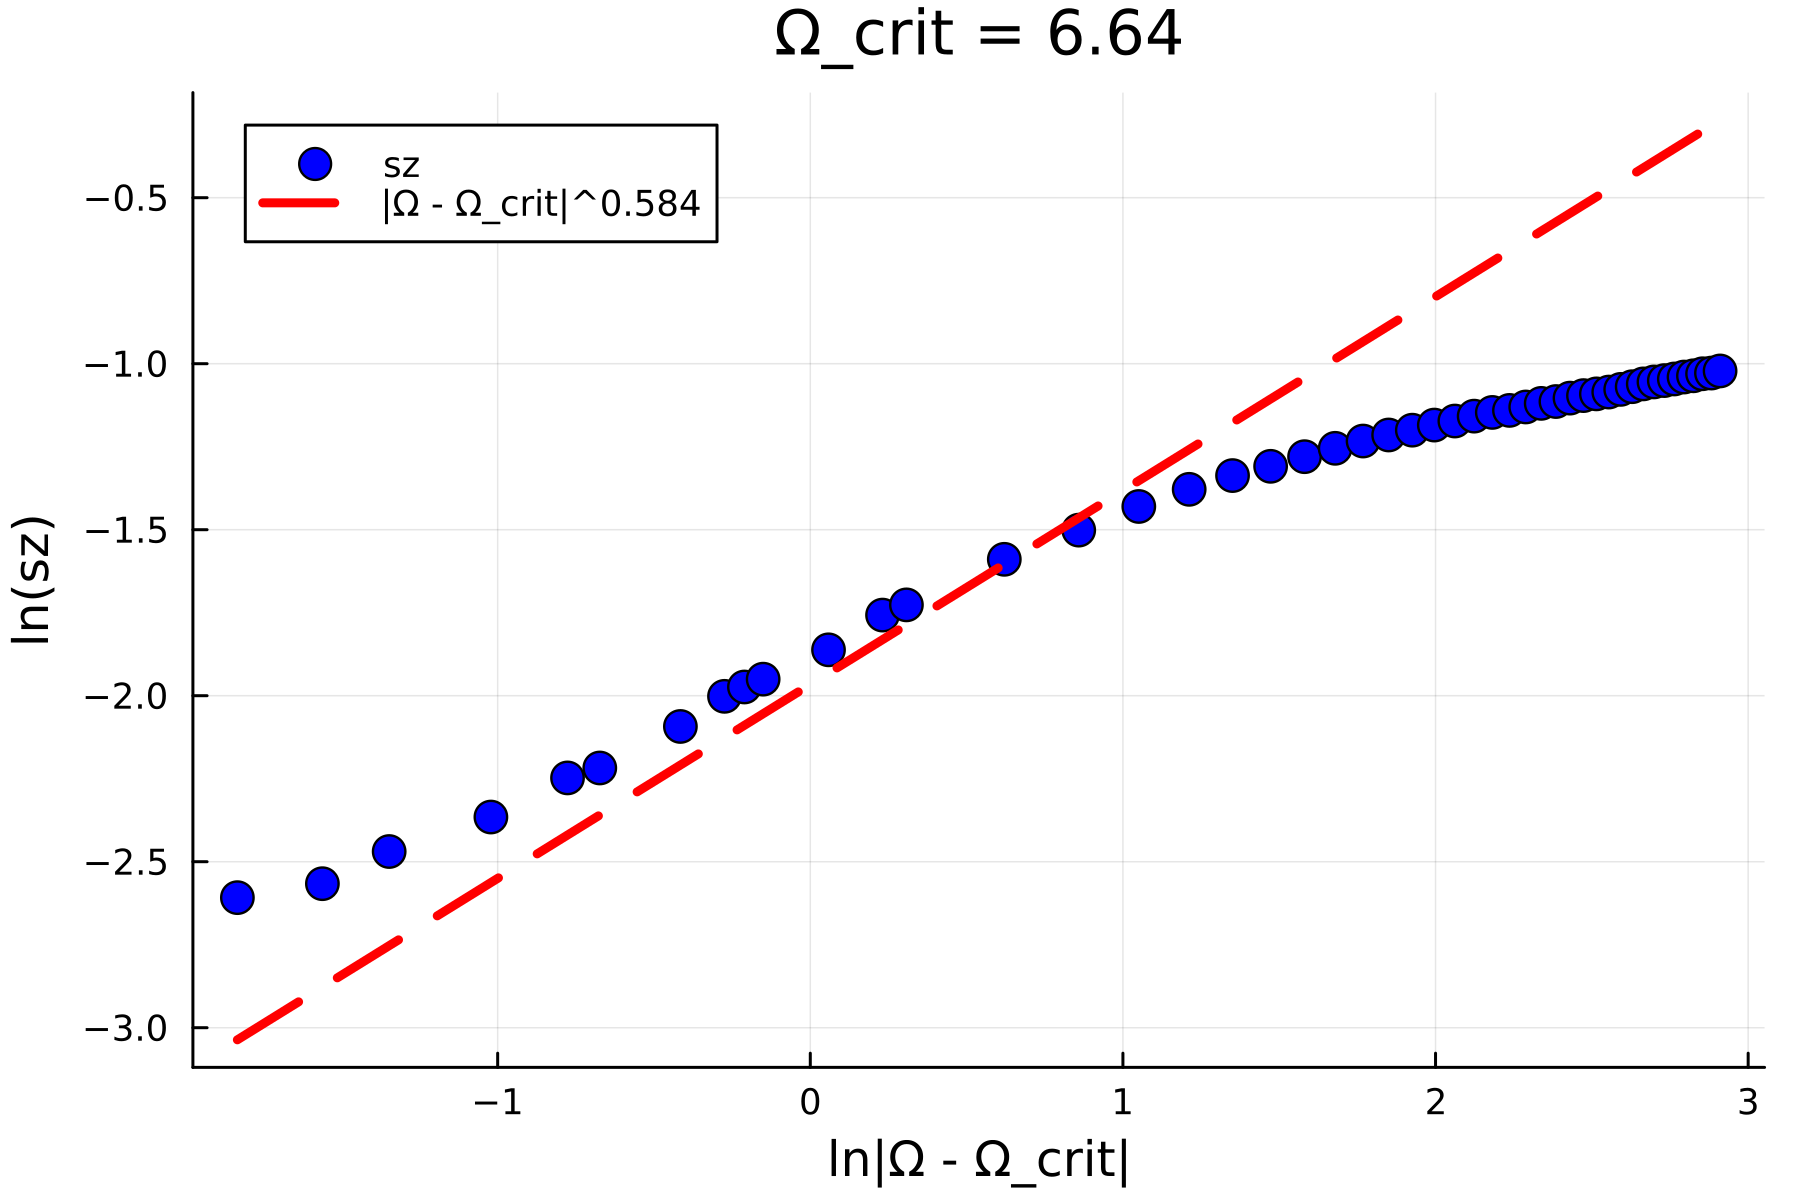

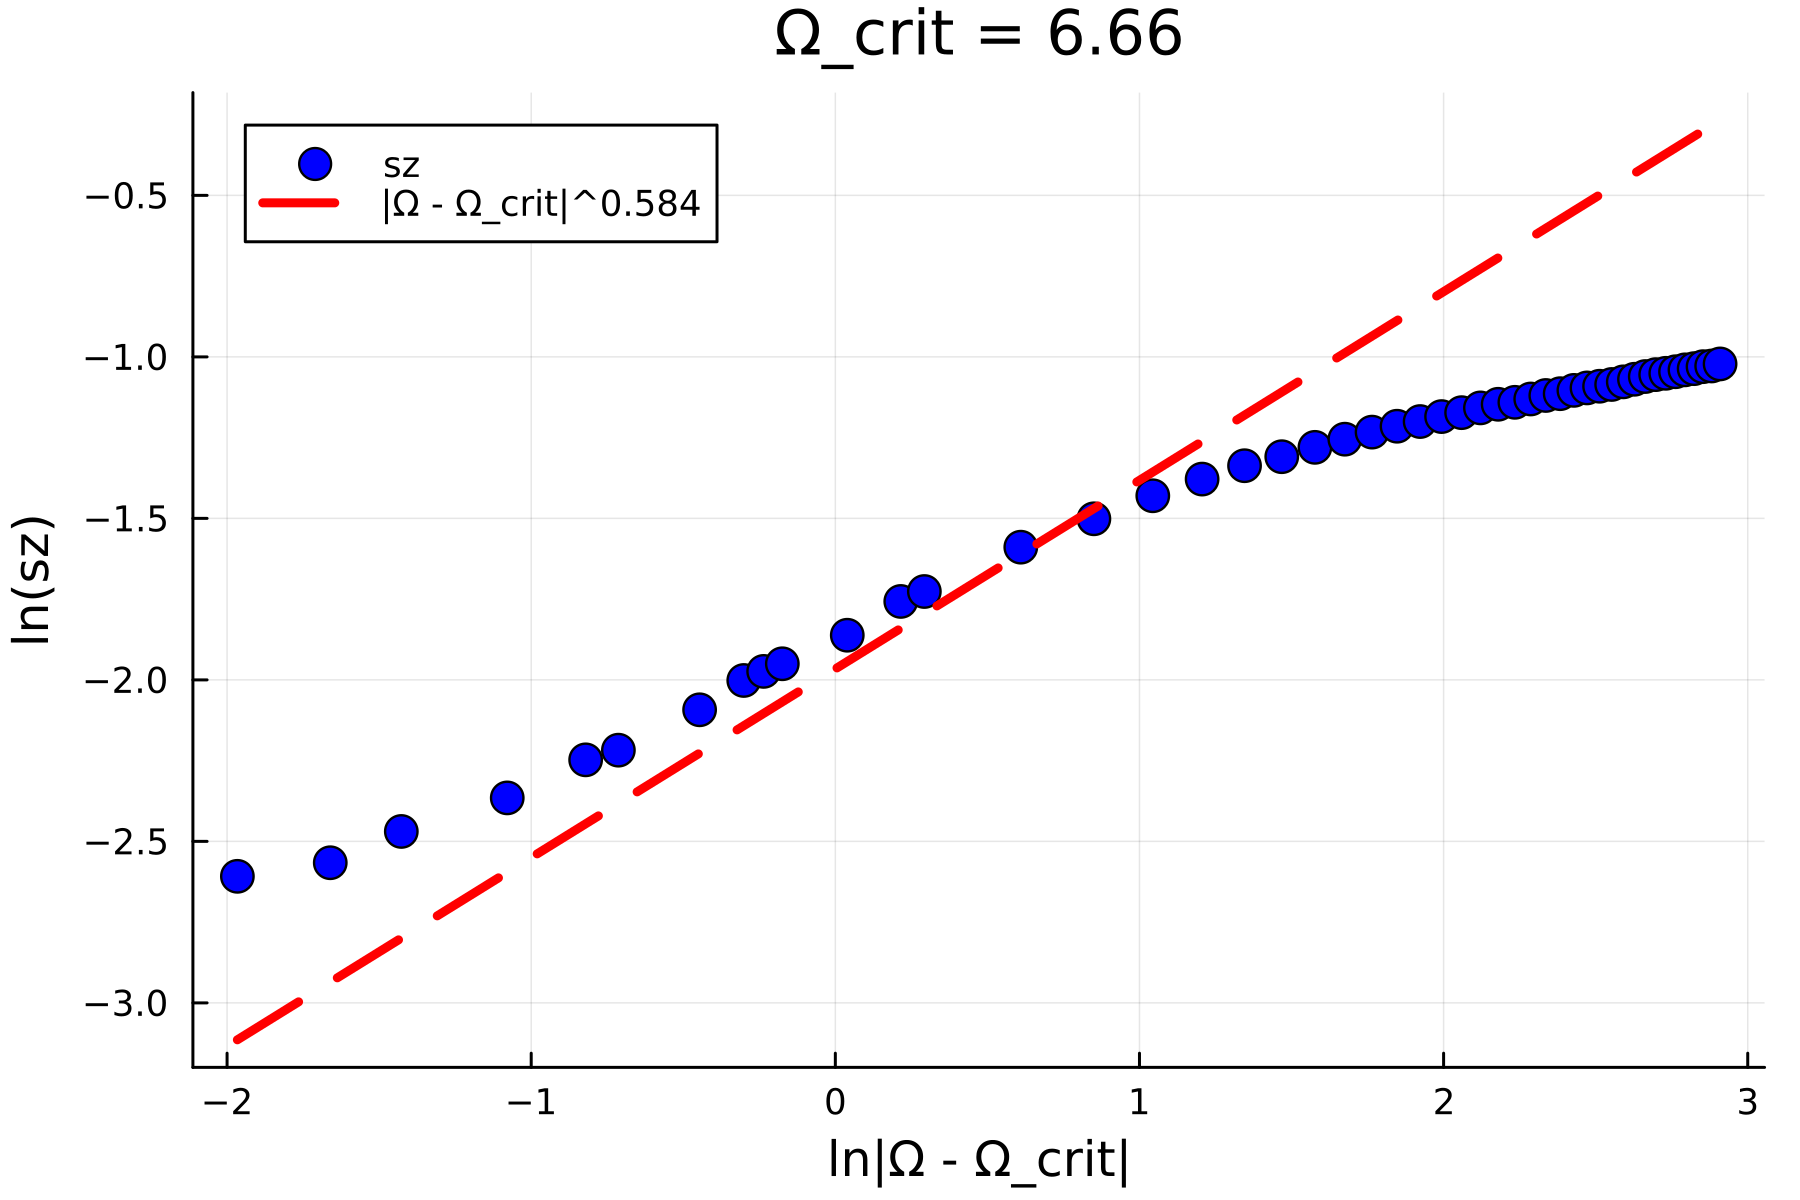

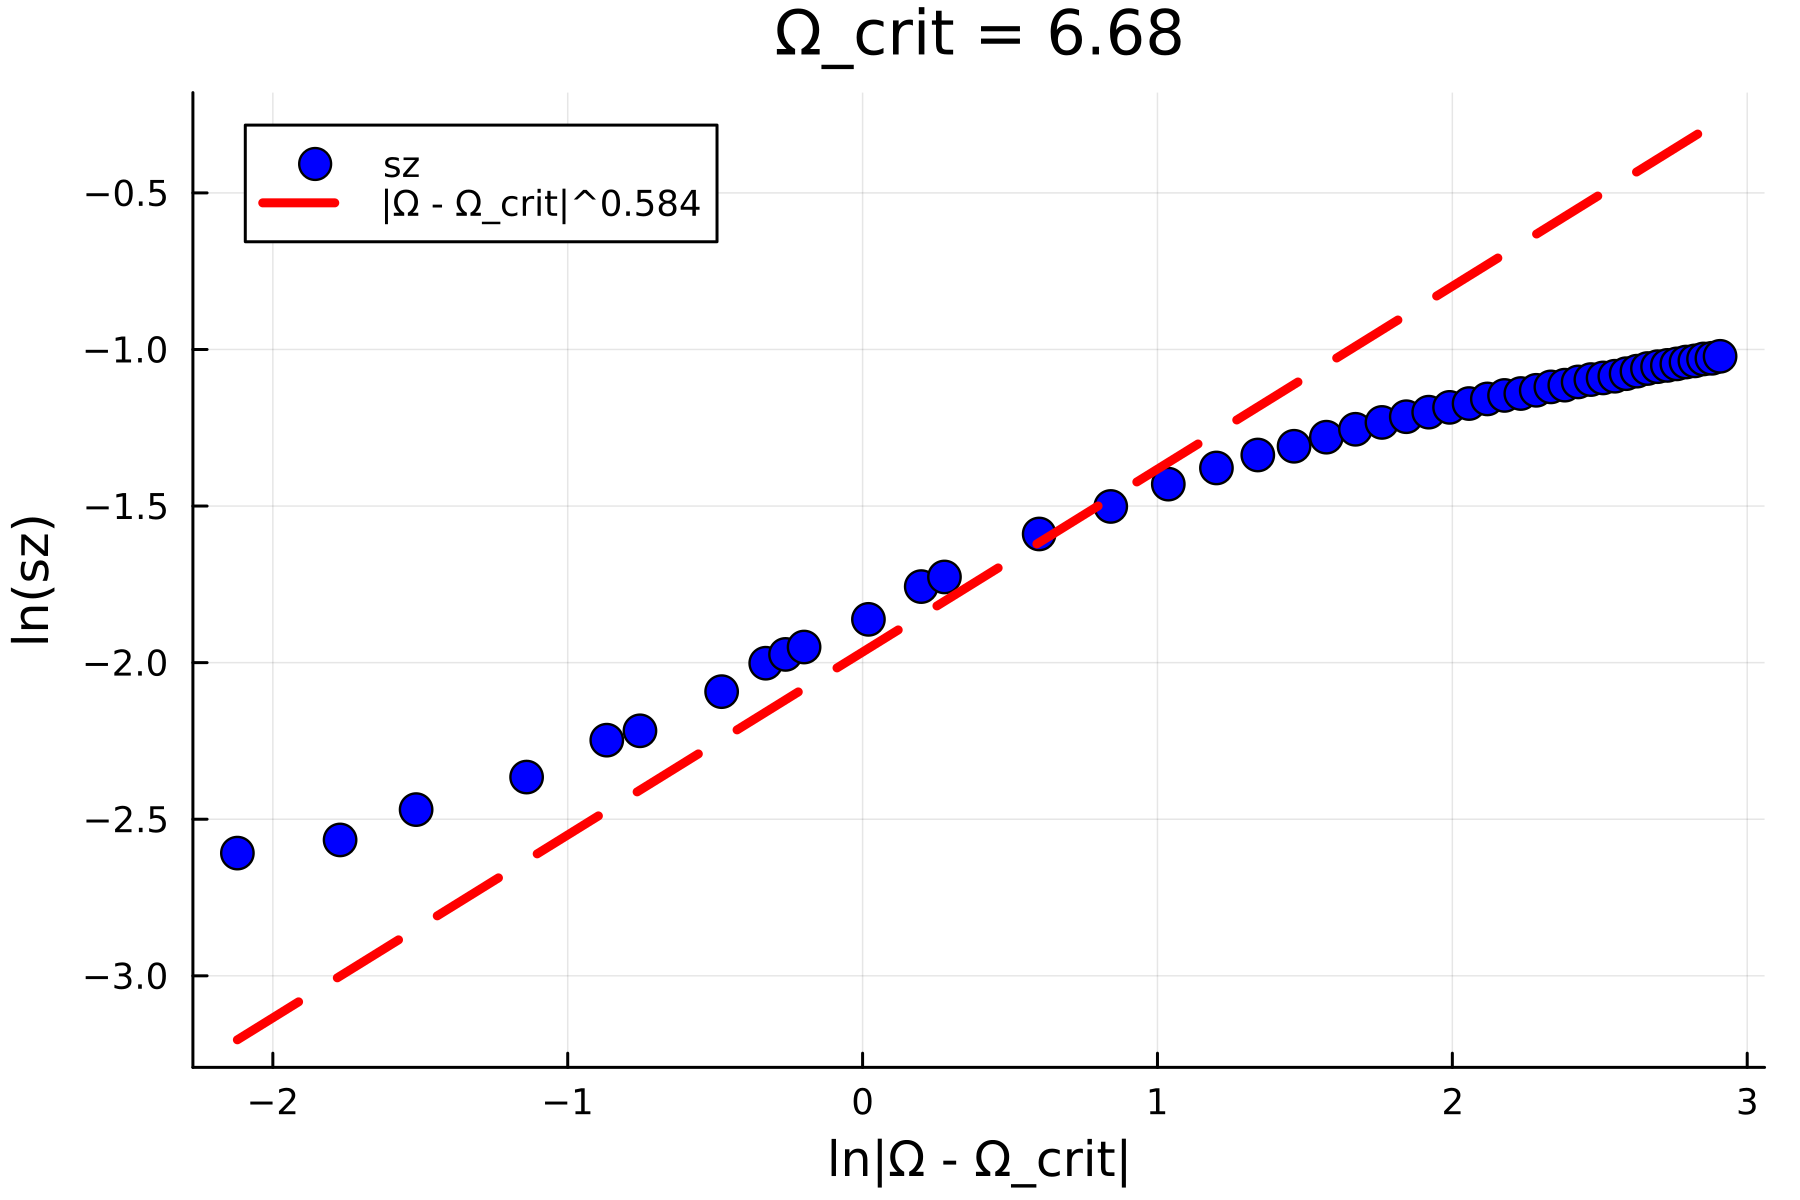

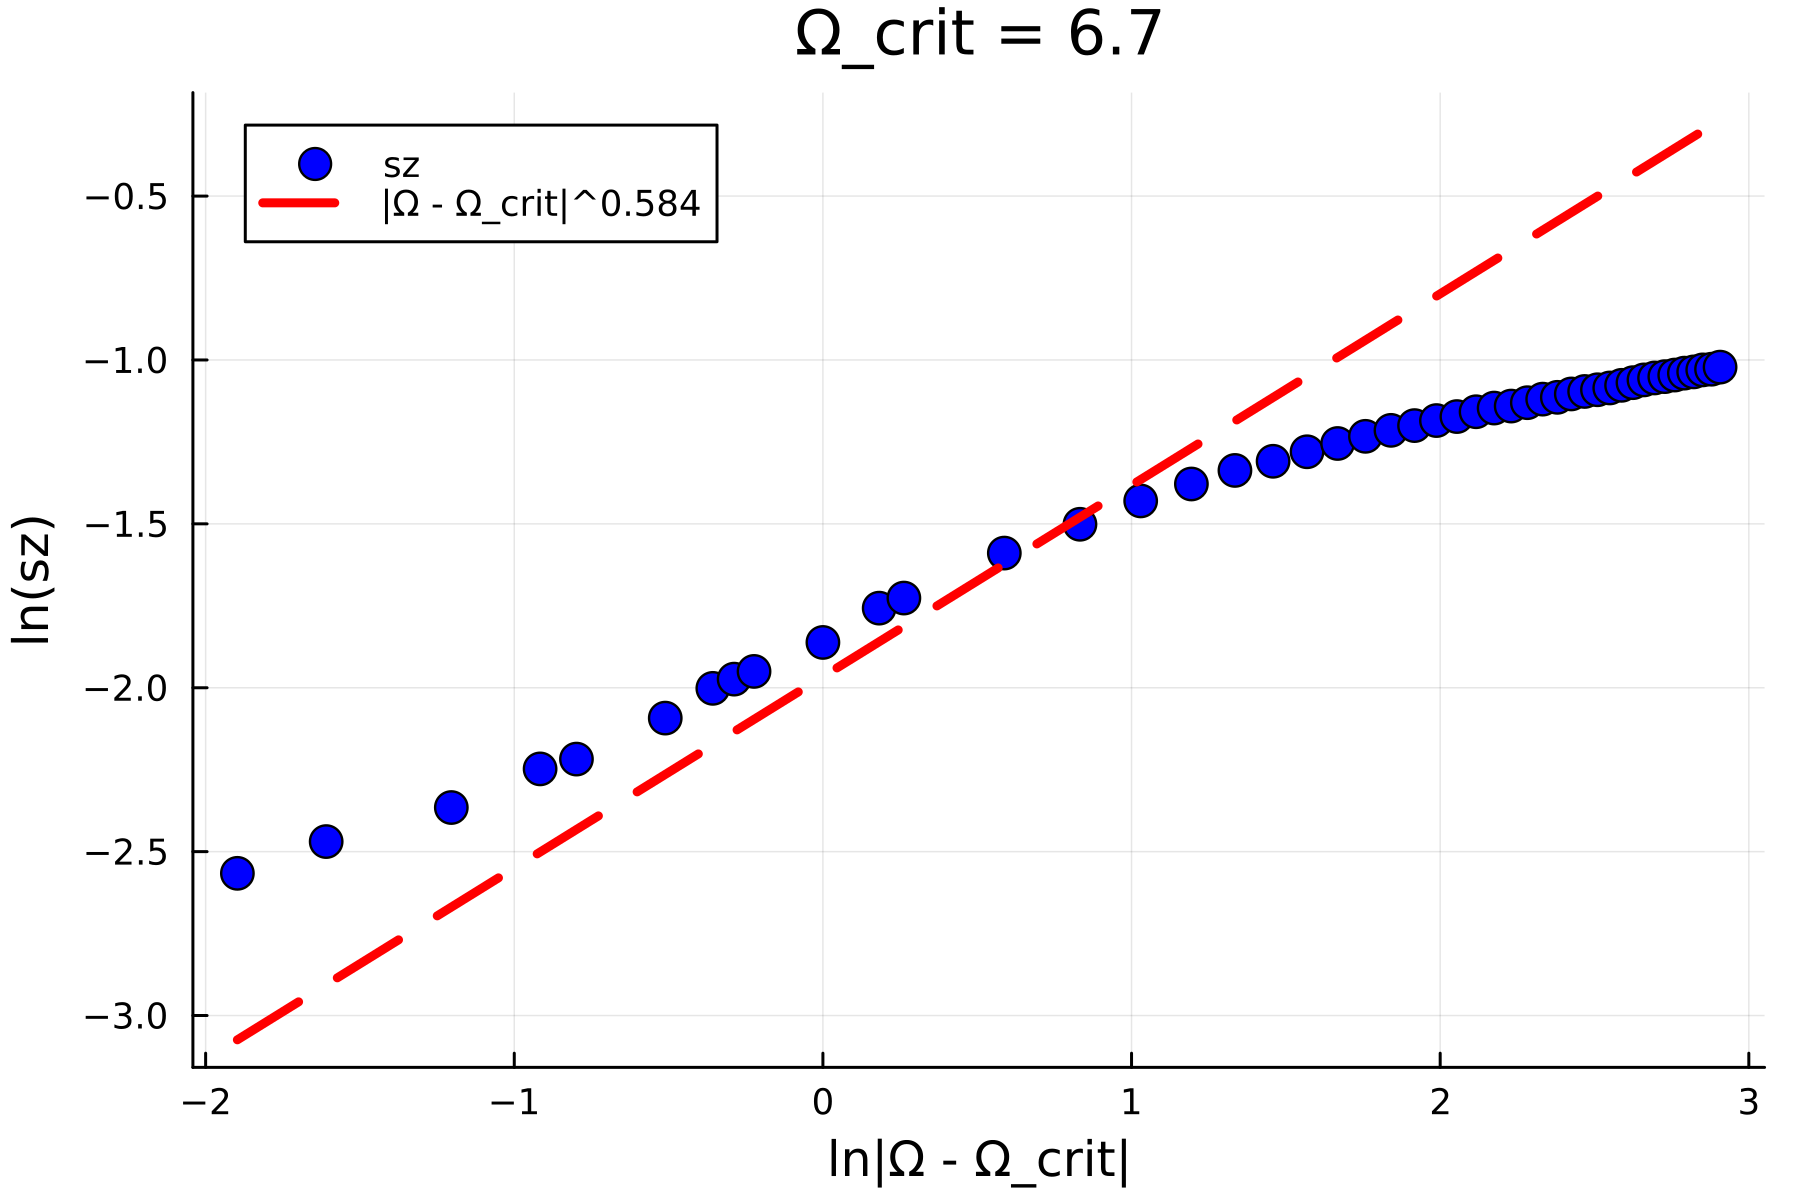

In [304]:
Ω_crit_values = 6.4:0.02:6.7
fixed_beta = MyParams.beta    
prefactor = 0.14
for Ω_crit in Ω_crit_values
    final_sz_values = Float64[]
    filtered_Ω_values = Float64[]
    for Ω in MyParams.Ω_values
        if Ω - Ω_crit > 0.1
            data = data_dict[Ω]
            sz_mean_mean = vec(data["sz_mean_mean"])
            last_value = last(sz_mean_mean)
            push!(final_sz_values, last_value)
            push!(filtered_Ω_values, Ω)
        end
    end
    xaxis = log.(abs.(filtered_Ω_values .- Ω_crit))
    yaxis = log.(final_sz_values)
    p3 = scatter(
        xaxis, 
        yaxis,
        xlabel="ln|Ω - Ω_crit|",
        ylabel="ln(sz)",
        marker=:circle,
        markersize=6,
        color=:blue,
        legend=:topleft,
        label="sz",
        #xlim=[-0.5,1.25],
        #ylim=[-2, -0.9],
        title="Ω_crit = $Ω_crit"
    )
    power_law_y = log.(abs.(filtered_Ω_values .- Ω_crit) .^ fixed_beta .* prefactor)
    plot!(
        xaxis, 
        power_law_y,
        color=:red,
        linestyle=:dash,
        label="|Ω - Ω_crit|^$(fixed_beta)",
        linewidth=3
    )
    display(p3)
end